# Recommenders

In [1]:
import os
import sys

# ! Before importing tensorflow set devices (-1 for NO GPU Acceleration)
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [ ]:
print(sys.path)
sys.path

In [2]:
from tempfile import TemporaryDirectory
import scrapbook as sb
import tensorflow as tf
tf.get_logger().setLevel('ERROR') # only show error messages

print(f"System version: {sys.version}")
print(f"Tensorflow version: {tf.__version__}")

2023-01-02 06:25:27.153129: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


KeyboardInterrupt: 

In [ ]:
from recommenders_tests import load_small

### Load MIND - Dataset (DEMO)

#### Needed libraries

In [3]:
import sys
import os
from tempfile import TemporaryDirectory

from recommenders.models.newsrec.io.mind_iterator import MINDIterator
from recommenders.models.newsrec.newsrec_utils import get_mind_data_set
from recommenders.models.deeprec.deeprec_utils import download_deeprec_resources
from recommenders.models.newsrec.newsrec_utils import prepare_hparams


ModuleNotFoundError: No module named 'recommenders.models'

In [5]:
from recommenders.models.newsrec.io.mind_all_iterator import MINDAllIterator

#### Download demo-data for MIND if needed

Used code from: https://github.com/microsoft/recommenders/blob/main/examples/00_quick_start/naml_MIND.ipynb

In [11]:
mind_url, mind_train_dataset, mind_dev_dataset, mind_utils = get_mind_data_set("demo")
print(mind_url)
print(mind_train_dataset)
print(mind_utils)

https://recodatasets.z20.web.core.windows.net/newsrec/
MINDdemo_train.zip
MINDdemo_utils.zip


In [ ]:
tmpdir = TemporaryDirectory()
data_path = tmpdir.name

train_news_file = os.path.join(data_path, 'train', r'news.tsv')
train_behaviors_file = os.path.join(data_path, 'train', r'behaviors.tsv')
valid_news_file = os.path.join(data_path, 'valid', r'news.tsv')
valid_behaviors_file = os.path.join(data_path, 'valid', r'behaviors.tsv')
wordEmb_file = os.path.join(data_path, "utils", "embedding_all.npy")
userDict_file = os.path.join(data_path, "utils", "uid2index.pkl")
wordDict_file = os.path.join(data_path, "utils", "word_dict_all.pkl")
vertDict_file = os.path.join(data_path, "utils", "vert_dict.pkl")
subvertDict_file = os.path.join(data_path, "utils", "subvert_dict.pkl")
yaml_file = os.path.join(data_path, "utils", r'naml.yaml')

# Use demo code here
mind_url, mind_train_dataset, mind_dev_dataset, mind_utils = get_mind_data_set("demo")

if not os.path.exists(train_news_file):
    download_deeprec_resources(mind_url, os.path.join(data_path, 'train'), mind_train_dataset)
    
if not os.path.exists(valid_news_file):
    download_deeprec_resources(mind_url, \
                               os.path.join(data_path, 'valid'), mind_dev_dataset)
if not os.path.exists(yaml_file):
    download_deeprec_resources(r'https://recodatasets.z20.web.core.windows.net/newsrec/', \
                               os.path.join(data_path, 'utils'), mind_utils)

## Load MIND-Dataset SMALL
<a id = "load_small"></a>


In [62]:

data_path = "Dataset_small"

train_news_file = os.path.join(data_path, 'train', r'news.tsv')
train_behaviors_file = os.path.join(data_path, 'train', r'behaviors.tsv')
valid_news_file = os.path.join(data_path, 'valid', r'news.tsv')
valid_behaviors_file = os.path.join(data_path, 'valid', r'behaviors.tsv')
wordEmb_file = os.path.join(data_path, "utils", "embedding_all.npy")
userDict_file = os.path.join(data_path, "utils", "uid2index.pkl")
wordDict_file = os.path.join(data_path, "utils", "word_dict_all.pkl")
vertDict_file = os.path.join(data_path, "utils", "vert_dict.pkl")
subvertDict_file = os.path.join(data_path, "utils", "subvert_dict.pkl")

# Use yaml as needed
# yaml_file = os.path.join(data_path, "utils", r'naml.yaml')

# Use demo code here
mind_url, mind_train_dataset, mind_dev_dataset, mind_utils = get_mind_data_set("small")

if not os.path.exists(train_news_file):
    download_deeprec_resources(mind_url, os.path.join(data_path, 'train'), mind_train_dataset)
    
if not os.path.exists(valid_news_file):
    download_deeprec_resources(mind_url, \
                               os.path.join(data_path, 'valid'), mind_dev_dataset)
if not os.path.exists(yaml_file):
    download_deeprec_resources(r'https://recodatasets.z20.web.core.windows.net/newsrec/', \
                               os.path.join(data_path, 'utils'), mind_utils)

100%|██████████| 51.7k/51.7k [00:07<00:00, 6.59kKB/s]
100%|██████████| 30.2k/30.2k [00:03<00:00, 7.57kKB/s]
100%|██████████| 152k/152k [00:06<00:00, 23.8kKB/s] 


### Statistics MIND

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

train_news_file
train_behaviors_file

data_news = pd.read_csv(train_news_file,delimiter="\t",)
data_behavoirs = pd.read_csv(train_behaviors_file,delimiter="\t")

data_news.columns=['News ID',
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities",
"Abstract Entities "]

data_behavoirs.columns = ['Impression ID', 'User ID', 'Time', 'History' , 'Impressions']



In [16]:
data_behavoirs['Impressions']

0         N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
1         N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
2                       N35729-0 N33632-0 N49685-1 N27581-0
3         N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
4               N21119-1 N53696-0 N33619-1 N25722-0 N2869-0
                                ...                        
156959    N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156960    N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156961    N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156962    N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...
156963                  N61233-0 N33828-1 N19661-0 N41934-0
Name: Impressions, Length: 156964, dtype: object

In [17]:
data_news.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
1,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
2,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
3,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
4,N2073,sports,football_nfl,Should NFL be able to fine players for critici...,Several fines came down against NFL players fo...,https://assets.msn.com/labs/mind/AAJ4lap.html,"[{""Label"": ""National Football League"", ""Type"":...","[{""Label"": ""National Football League"", ""Type"":..."


In [18]:
print(f"Size of the training instances for news \t{len(data_news)}")
print(f"Size of the training instances for behaviors \t{len(data_behavoirs)}")

Size of the training instances for news 	51281
Size of the training instances for behaviors 	156964


####News Statistics

Title lengths

In [19]:
# Save lenght of each title in the data
title_lens = [len(tit) for tit in data_news['Title']]

In [20]:
num_bins = len(set(title_lens))
print(f"Number of different title sizes : {num_bins}")

Number of different title sizes : 184


In [21]:
import numpy as np
titles_np = np.array(title_lens)

# Mean
tit_mean = titles_np.mean()
# Variance
tit_var = titles_np.var()
# Standard dev.
tit_std = titles_np.std()

print(f"Mean : {tit_mean} Variance : {tit_var}")

Mean : 66.24716756693512 Variance : 369.28741933833385


In [1]:
from scipy.stats import norm


plt.figure(1)

plt.hist(title_lens,bins=list(set(title_lens)))
plt.title("Histogram of different title lenghts")
plt.xlabel("Title length")
plt.ylabel("Number of entries")
plt.figure(2)
plt.plot(list(set(title_lens)),norm.pdf(list(set(title_lens)),tit_mean,tit_std))
plt.show()

NameError: name 'plt' is not defined

Biggest/Smallest titles (in terms of characters)

In [24]:

longest_title_id,max_tit = np.argmax(titles_np,0),np.max(titles_np,0)
shortest_title_id,min_tit = np.argmin(titles_np,0),np.min(titles_np,0)

print(f"Longest title with {max_tit} chars: '{data_news['Title'][longest_title_id]}'")
print(f"Shortest title with {min_tit} chars: '{data_news['Title'][shortest_title_id]}'")

Longest title with 333 chars: 'The Price You Pay: The spiraling cost of college	In our new series, The Price You Pay," we look at the rising cost of attending a public college, which has risen ten-fold since 1965. Tony Dokoupil reports on how amenities at some universities, aimed at attracting more students, are adding to the spiralling cost of higher education.'
Shortest title with 11 chars: 'NBA Dancers'


Take a look at the different categories

In [25]:
categories = set(data_news['Category'])
print(f"Number of different categories : {len(categories)}")
print(categories)

Number of different categories : 17
{'weather', 'news', 'tv', 'foodanddrink', 'travel', 'health', 'video', 'kids', 'middleeast', 'lifestyle', 'autos', 'northamerica', 'sports', 'music', 'finance', 'entertainment', 'movies'}


In [26]:
num_in_categories = {}

# Number of entries for each category
for cat in categories:
  num_in_categories[cat] = len(data_news.loc[data_news['Category'] == cat])
  

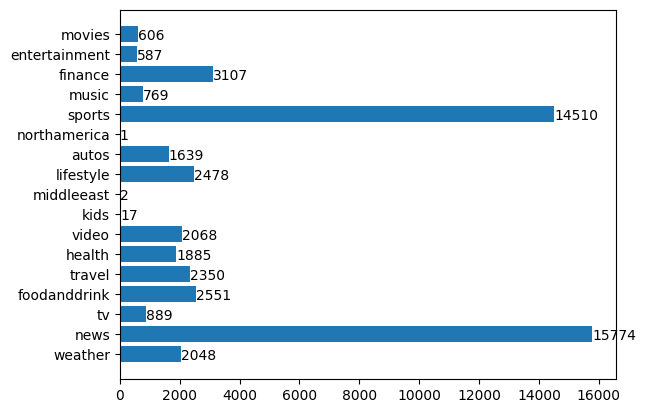

In [27]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Initialize bar plot
bars = ax.barh([i for i in range(len(categories))],num_in_categories.values(),tick_label=list(categories))

# Add values to the right of the bars
for i, v in enumerate(num_in_categories.values()):
    ax.text(v + 3, i-0.25, str(v),
            color = 'black')
plt.show()

####Behavior statistics

In [60]:
data_behavoirs.head()

,Impression ID,User ID,Time,History,Impressions
0,2,U84185,11/12/2019 10:36:47 AM,N27209 N11723 N4617 N12320 N11333 N24461 N2211...,N13089-0 N18101-0 N1248-0 N26273-0 N12770-1 N1...
1,3,U11552,11/11/2019 1:03:52 PM,N2139,N18390-0 N10537-0 N23967-1
2,4,U68381,11/11/2019 6:44:05 AM,N27420 N11621 N25416 N25457 N5124 N11751 N1175...,N15660-0 N18609-0 N2831-0 N5677-0 N19010-0 N15...
3,5,U52303,11/12/2019 3:11:52 AM,N1332 N12667,N15645-0 N7911-1
4,6,U26536,11/11/2019 3:13:36 PM,N17674 N7165 N18669 N20855 N9748 N44 N24245 N2...,N15244-0 N2167-0 N20122-0 N16945-0 N9480-0 N36...


Histogram which shows how many users have how many history entries

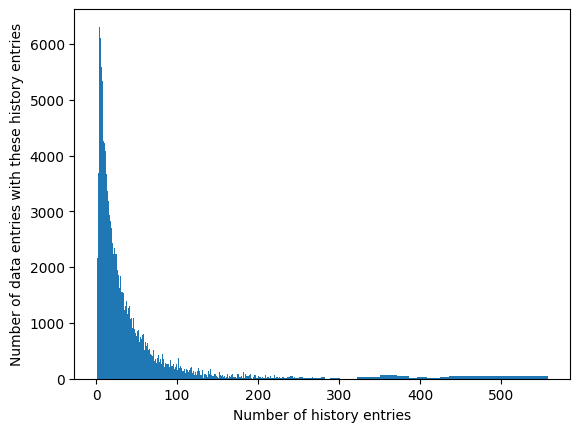

In [29]:
# Excluding nan values
parse_history_lens = [len(v.split(' ')) for v in data_behavoirs['History'] if v is not np.nan]

# Draw histogram
plt.hist(parse_history_lens,bins=sorted(list(set(parse_history_lens))))
plt.xlabel("Number of history entries")
plt.ylabel("Number of data entries with these history entries")
plt.show()

In [30]:
parse_history_lens = np.array(parse_history_lens)

print(f"Mean: {parse_history_lens.mean()} Variance: {parse_history_lens.var()} Std: {parse_history_lens.std()}")

Mean: 33.22554414998113 Variance: 1632.8575252932612 Std: 40.40863181664607


Impressions

In [31]:
impression_sizes = [len(imp.split(' ')) for imp in data_behavoirs['Impressions']]

print(len(impression_sizes))


156964


Numbers for impressions

In [32]:
print(f"Number of different sizes of impressions:\t {len(set(impression_sizes))}")
print(f"Average length of impression:\t\t\t {np.mean(impression_sizes)}")
print(f"Standard deviation in impression length:\t {np.std(impression_sizes)}")
print(f"Min/Max length:\t\t\t\t\t {np.min(impression_sizes)}/{np.max(impression_sizes)}")

Number of different sizes of impressions:	 296
Average length of impression:			 37.22791213271833
Standard deviation in impression length:	 38.59404533815211
Min/Max length:					 2/299


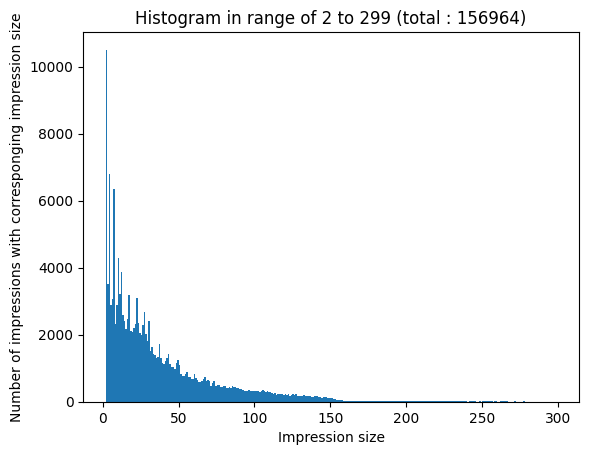

In [41]:
plt.hist(impression_sizes,bins=list(set(impression_sizes)))
plt.xlabel("Impression size")
plt.ylabel("Number of impressions with corresponging impression size")
plt.title(f"Histogram in range of {np.min(impression_sizes)} to {np.max(impression_sizes)} (total : {len(impression_sizes)})")
plt.show()

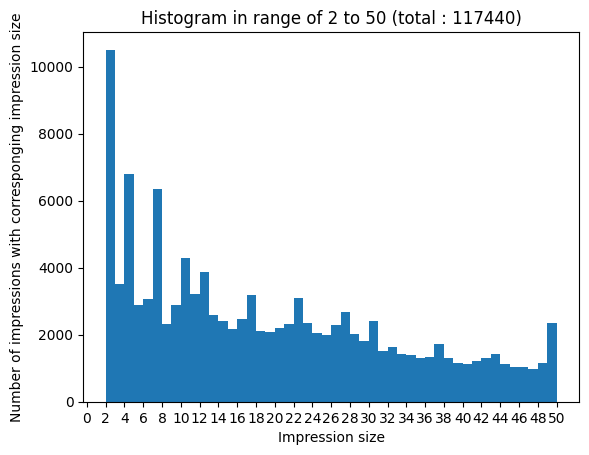

In [42]:
shrink_to_fifty = [i for i in impression_sizes if i <= 50]

plt.hist(shrink_to_fifty,bins=list(set(shrink_to_fifty)))
plt.xlabel("Impression size")
plt.ylabel("Number of impressions with corresponging impression size")
plt.xticks(range(0,51,2))
plt.title(f"Histogram in range of 2 to 50 (total : {len(shrink_to_fifty)})")
plt.show()

In [50]:
(16228/22033)*100

73.65315662869332

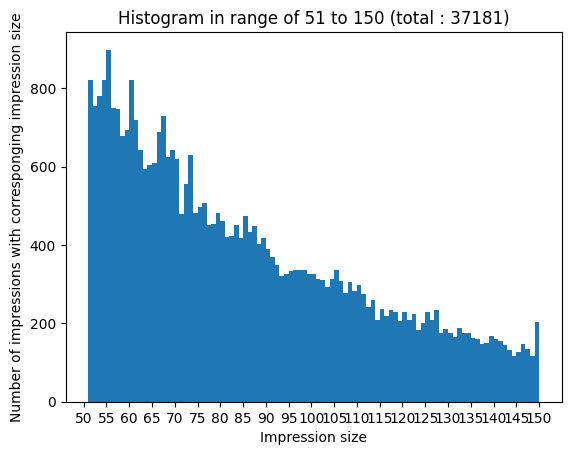

In [43]:
shrink_to_onefifty= [i for i in impression_sizes if i > 50 and i <=150]

plt.hist(shrink_to_onefifty,bins=list(set(shrink_to_onefifty)))
plt.xlabel("Impression size")
plt.ylabel("Number of impressions with corresponging impression size")
plt.xticks(range(50,151,5))
plt.title(f"Histogram in range of 51 to 150 (total : {len(shrink_to_onefifty)})")
plt.show()

#### Candidates

In [44]:
# Calculate the number of candidates per impression
impression_sizes = [len(imp.split(' ')) for imp in data_behavoirs['Impressions']]
num_of_candidates = []
for imp in data_behavoirs['Impressions']: # Note that impressions are in the form of "imprID_1-0 imprID_2-1 imprID_3-0 ..."
    counter = 0
    for s in imp.split(' '):
        if s.split('-')[1] == '1':  
            counter += 1
    num_of_candidates.append(counter)


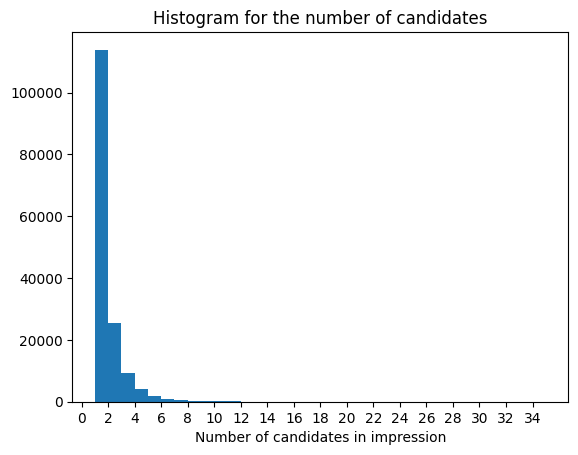

In [50]:
plt.hist(num_of_candidates,bins=sorted(list(set(num_of_candidates))))
plt.xlabel("Number of candidates in impression")
plt.xticks(range(0,36,2))
plt.title(f"Histogram for the number of candidates")
plt.show()

In [60]:
len(num_of_candidates)

156964

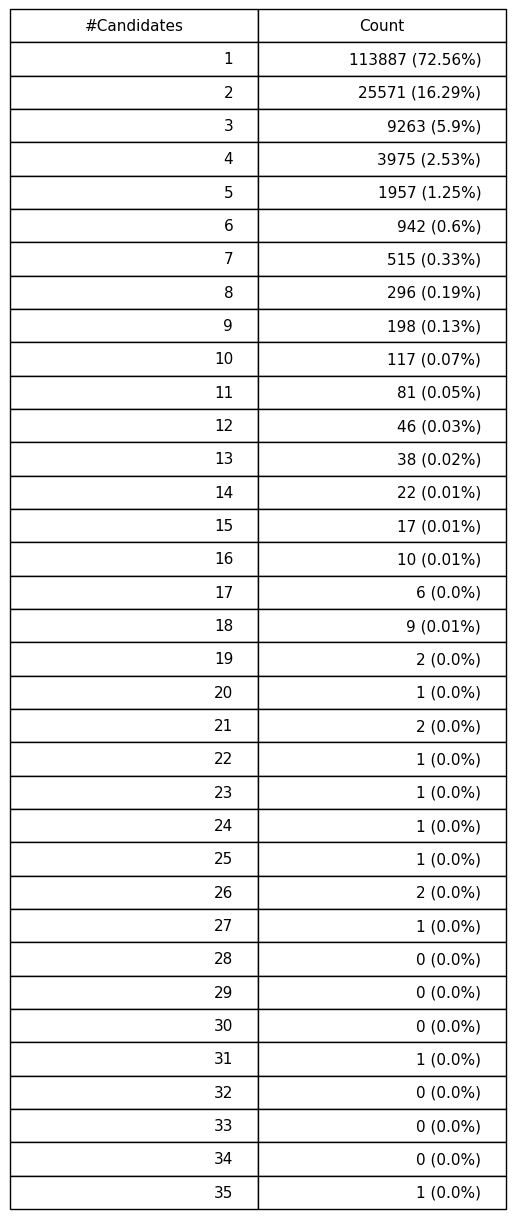

In [68]:
tot = len(num_of_candidates)
table_data = []
for i in range(1,max(num_of_candidates)+1):
    num = len([c for c in num_of_candidates if c == i])
    # print(f'Number of impression with {i} candidates: {num} ({round((num/tot)*100,2)}%)')
    table_data.append([i,f"{num} ({round((num/tot)*100,2)}%)"])

fig, ax = plt.subplots()

table = ax.table(cellText=table_data,loc="center",colLabels=["#Candidates","Count"])
table.set_fontsize(11)
table.scale(1,2)
ax.axis('off')
plt.show()

### Setup hyperparameters

In [ ]:
batch_size = 32
epochs = 5

seed = 42

hparams = prepare_hparams(yaml_file, 
                          wordEmb_file=wordEmb_file,
                          wordDict_file=wordDict_file, 
                          userDict_file=userDict_file,
                          vertDict_file=vertDict_file, 
                          subvertDict_file=subvertDict_file,
                          batch_size=batch_size,
                          epochs=epochs)

### Setup for WandB-Visualization

In [ ]:
!pip install wandb
!wandb login

In [ ]:
import wandb


In [ ]:
wandb.init(project="recommenders_NAML")

In [ ]:
import numpy as np
import zipfile
from tqdm import tqdm
import scrapbook as sb

Mount drive when using colab

In [ ]:
from google.colab import drive

drive.mount('/content/drive')



## Most common models

### 1. Neural Recommendation with Long- and Short-term User Representations (LSTUR)

Paper: https://aclanthology.org/P19-1033.pdf

Code : https://github.com/microsoft/recommenders

In [ ]:
from recommenders.models.newsrec.models.lstur import LSTURModel

In [ ]:
model = LSTURModel(hparams,MINDAllIterator,42)

Run without training

In [ ]:
print(model.run_eval(valid_news_file,valid_behaviors_file))

In [ ]:
import tensorflow as tf
model.fit(train_news_file,train_behaviors_file,valid_news_file,valid_behaviors_file)


1085it [05:51,  3.09it/s]
0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
18693it [00:35, 528.63it/s]
7507it [04:23, 28.44it/s]
7538it [00:01, 5387.19it/s]
at epoch 1
train info: logloss loss:1.4877065252049178
eval info: group_auc:0.5951, mean_mrr:0.2567, ndcg@10:0.3478, ndcg@5:0.2799
at epoch 1 , train time: 351.4 eval time: 311.0
<recommenders.models.newsrec.models.lstur.LSTURModel at 0x7ff306242390>

In [ ]:
for idx in range(2,5,1):
  model.fit(train_news_file,train_behaviors_file,valid_news_file,valid_behaviors_file)

1085it [05:42,  3.17it/s]
18693it [00:34, 537.72it/s]
7507it [04:16, 29.26it/s]
7538it [00:01, 5635.13it/s]
at epoch 1
train info: logloss loss:1.4073863327228529
eval info: group_auc:0.6251, mean_mrr:0.2773, ndcg@10:0.3703, ndcg@5:0.3056
at epoch 1 , train time: 342.7 eval time: 303.1
1085it [05:41,  3.18it/s]
18693it [00:35, 527.07it/s]
7507it [04:21, 28.76it/s]
7538it [00:01, 5443.98it/s]
at epoch 1
train info: logloss loss:1.3618857577099779
eval info: group_auc:0.6331, mean_mrr:0.2872, ndcg@10:0.38, ndcg@5:0.3165
at epoch 1 , train time: 341.7 eval time: 308.1
1085it [05:40,  3.18it/s]
18693it [00:33, 562.39it/s]
7507it [03:55, 31.91it/s]
7538it [00:01, 5645.08it/s]
at epoch 1
train info: logloss loss:1.3223843703072191
eval info: group_auc:0.6389, mean_mrr:0.2982, ndcg@10:0.3871, ndcg@5:0.3252
at epoch 1 , train time: 341.0 eval time: 280.0

In [ ]:
model.model.save_weights("/content/drive/MyDrive/Colab Notebooks/Masterthesis/Models/LSTUR/","LSTUR_weights")

In [ ]:
logs = []

# train info: logloss loss:0
# {'group_auc': 0.5102, 'mean_mrr': 0.219, 'ndcg@5': 0.2244, 'ndcg@10': 0.2852}
epoch_1 = {}
epoch_1["group_auc"] = 0.5102
epoch_1["mean_mrr"] = 0.219
epoch_1["ndcg@10"] = 0.2244
epoch_1["ndcg@5"] = 0.2852
epoch_1["logloss loss"] = 0

logs.append(epoch_1)

# train info: logloss loss:1.4877065252049178
# eval info: group_auc:0.5951, mean_mrr:0.2567, ndcg@10:0.3478, ndcg@5:0.2799

epoch_1 = {}
epoch_1["group_auc"] = 0.5951
epoch_1["mean_mrr"] = 0.2567
epoch_1["ndcg@10"] = 0.3478
epoch_1["ndcg@5"] = 0.2799
epoch_1["logloss loss"] = 1.4877065252049178

print(epoch_1)

logs.append(epoch_1)

# train info: logloss loss:1.4073863327228529
# eval info: group_auc:0.6251, mean_mrr:0.2773, ndcg@10:0.3703, ndcg@5:0.3056
epoch_1 = {}
epoch_1["group_auc"] = 0.6251
epoch_1["mean_mrr"] = 0.2773
epoch_1["ndcg@10"] = 0.3703
epoch_1["ndcg@5"] = 0.3056
epoch_1["logloss loss"] = 1.4073863327228529

logs.append(epoch_1)

#train info: logloss loss:1.3618857577099779
#eval info: group_auc:0.6331, mean_mrr:0.2872, ndcg@10:0.38, ndcg@5:0.3165

epoch_1 = {}
epoch_1["group_auc"] = 0.6331
epoch_1["mean_mrr"] = 0.2872
epoch_1["ndcg@10"] = 0.38
epoch_1["ndcg@5"] = 0.3165
epoch_1["logloss loss"] = 1.3618857577099779

logs.append(epoch_1)

# train info: logloss loss:1.3223843703072191
# eval info: group_auc:0.6389, mean_mrr:0.2982, ndcg@10:0.3871, ndcg@5:0.3252

epoch_1 = {}
epoch_1["group_auc"] = 0.6389
epoch_1["mean_mrr"] = 0.2982
epoch_1["ndcg@10"] = 0.3871
epoch_1["ndcg@5"] = 0.3252
epoch_1["logloss loss"] = 1.3223843703072191

logs.append(epoch_1)

for i in range(5):
  wandb.log(logs[i],i)



In [ ]:
wandb.log(logs[4],5)

In [ ]:
print(logs[4])

In [ ]:
wandb.finish()

### 2. Neural Recommendation with Attentive Multi-View Learning (NAML)

Paper: https://arxiv.org/pdf/1907.05576.pdf

Code : https://github.com/wuch15/IJCAI2019-NAML

In [ ]:
import tensorflow as tf

from recommenders.models.newsrec.models.naml import NAMLModel

# MINDAallIterator is the iterator for the NAML model provided by recommenders
model = NAMLModel(hparams,MINDAllIterator,42)

Fitting demo data with NAML


In [ ]:
print(tf.config.list_physical_devices('GPU'))

model.fit(train_news_file,train_behaviors_file,valid_news_file,valid_behaviors_file)

#eval_vals = model.run_eval(valid_news_file, valid_behaviors_file)

In [ ]:
evals = model.run_eval(valid_news_file, valid_behaviors_file)

In [ ]:
wandb.init(project="recommenders_NAML")

In [ ]:
logs = []

# logloss loss:1.492940714502115
# group_auc:0.5917, mean_mrr:0.2593, ndcg@10:0.3485, ndcg@5:0.2843
epoch_1 = {}
epoch_1["group_auc"] = 0.5917
epoch_1["mean_mrr"] = 0.2593
epoch_1["ndcg@10"] = 0.3485
epoch_1["ndcg@5"] = 0.2843
epoch_1["logloss loss"] = 1.492940714502115

logs.append(epoch_1)

# logloss loss:1.4204849718902517
# group_auc:0.6147, mean_mrr:0.2776, ndcg@10:0.3714, ndcg@5:0.3093

epoch_1 = {}
epoch_1["group_auc"] = 0.6147
epoch_1["mean_mrr"] = 0.2776
epoch_1["ndcg@10"] = 0.3714
epoch_1["ndcg@5"] = 0.3093
epoch_1["logloss loss"] = 1.4204849718902517

print(epoch_1)

logs.append(epoch_1)

# logloss loss:1.3749229467409547
# group_auc:0.6234, mean_mrr:0.2792, ndcg@10:0.3742, ndcg@5:0.3084
epoch_1 = {}
epoch_1["group_auc"] = 0.6234
epoch_1["mean_mrr"] = 0.2792
epoch_1["ndcg@10"] = 0.3742
epoch_1["ndcg@5"] = 0.3084
epoch_1["logloss loss"] = 1.3749229467409547

logs.append(epoch_1)

# logloss loss:1.3430268440378426
# group_auc:0.6376, mean_mrr:0.2864, ndcg@10:0.3815, ndcg@5:0.3168

epoch_1 = {}
epoch_1["group_auc"] = 0.6376
epoch_1["mean_mrr"] = 0.2864
epoch_1["ndcg@10"] = 0.3815
epoch_1["ndcg@5"] = 0.3168
epoch_1["logloss loss"] = 1.3430268440378426

logs.append(epoch_1)

# logloss loss:1.3205334546928582
# group_auc:0.6307, mean_mrr:0.2867, ndcg@10:0.3793, ndcg@5:0.3148

epoch_1 = {}
epoch_1["group_auc"] = 0.6307
epoch_1["mean_mrr"] = 0.2867
epoch_1["ndcg@10"] = 0.3793
epoch_1["ndcg@5"] = 0.3148
epoch_1["logloss loss"] = 1.3205334546928582

logs.append(epoch_1)

for l in logs:
  wandb.log(l,)



Save trained model (!only run if model has been trained!)

In [ ]:
model.model.save_weights("/content/drive/MyDrive/Colab Notebooks/Masterthesis/Models/","NAML_weights")

In [ ]:
import pandas as pd
v = pd.read_csv(valid_news_file,"\t")
print(v.head())

### 3. Neural Recommendation with Personalized Attention (NPA)

Paper: https://arxiv.org/pdf/1907.05559.pdf

Code : https://github.com/wuch15/KDD-NPA

In [ ]:
import sys
import os
import numpy as np
import zipfile
from tqdm import tqdm
import scrapbook as sb
from tempfile import TemporaryDirectory
import tensorflow as tf
tf.get_logger().setLevel('ERROR') # only show error messages

from recommenders.models.deeprec.deeprec_utils import download_deeprec_resources 
from recommenders.models.newsrec.newsrec_utils import prepare_hparams
from recommenders.models.newsrec.models.npa import NPAModel
from recommenders.models.newsrec.io.mind_iterator import MINDIterator
from recommenders.models.newsrec.newsrec_utils import get_mind_data_set

print("System version: {}".format(sys.version))
print("Tensorflow version: {}".format(tf.__version__))

In [ ]:
epochs = 5
seed = 42
batch_size = 32

# Options: demo, small, large
MIND_type = 'demo'

tmpdir = TemporaryDirectory()
data_path = tmpdir.name

train_news_file = os.path.join(data_path, 'train', r'news.tsv')
train_behaviors_file = os.path.join(data_path, 'train', r'behaviors.tsv')
valid_news_file = os.path.join(data_path, 'valid', r'news.tsv')
valid_behaviors_file = os.path.join(data_path, 'valid', r'behaviors.tsv')
wordEmb_file = os.path.join(data_path, "utils", "embedding.npy")
userDict_file = os.path.join(data_path, "utils", "uid2index.pkl")
wordDict_file = os.path.join(data_path, "utils", "word_dict.pkl")
yaml_file = os.path.join(data_path, "utils", r'npa.yaml')

mind_url, mind_train_dataset, mind_dev_dataset, mind_utils = get_mind_data_set(MIND_type)

if not os.path.exists(train_news_file):
    download_deeprec_resources(mind_url, os.path.join(data_path, 'train'), mind_train_dataset)
    
if not os.path.exists(valid_news_file):
    download_deeprec_resources(mind_url, \
                               os.path.join(data_path, 'valid'), mind_dev_dataset)
if not os.path.exists(yaml_file):
    download_deeprec_resources(r'https://recodatasets.z20.web.core.windows.net/newsrec/', \
                               os.path.join(data_path, 'utils'), mind_utils)

In [ ]:
hparams = prepare_hparams(yaml_file, 
                          wordEmb_file=wordEmb_file,
                          wordDict_file=wordDict_file, 
                          userDict_file=userDict_file,
                          batch_size=batch_size,
                          epochs=epochs)
print(hparams)

In [ ]:
from recommenders.models.newsrec.models.npa import NPAModel

# MINDAallIterator is the iterator for the NPA model provided by recommenders
model = NPAModel(hparams,MINDAllIterator,42)

In [ ]:
model = NPAModel(hparams, MINDIterator, seed=seed)

In [ ]:
model.run_eval(valid_news_file,valid_behaviors_file)

In [ ]:
model.fit(train_news_file,train_behaviors_file,valid_news_file,valid_behaviors_file)

In [ ]:
import wandb
wandb.init(project="recommenders_NAML")

In [ ]:
logs = []

# train info: logloss loss:0
# {'group_auc': 0.5229, 'mean_mrr': 0.2328, 'ndcg@10': 0.303, 'ndcg@5': 0.2376}
epoch_1 = {}
epoch_1["group_auc"] = 0.5229
epoch_1["mean_mrr"] = 0.2328
epoch_1["ndcg@10"] = 0.303
epoch_1["ndcg@5"] = 0.2376
epoch_1["logloss loss"] = 0

logs.append(epoch_1)

# train info: logloss loss:1.5230483573005564
# eval info: group_auc:0.5738, mean_mrr:0.247, ndcg@10:0.3324, ndcg@5:0.2635

epoch_1 = {}
epoch_1["group_auc"] = 0.5738
epoch_1["mean_mrr"] = 0.247
epoch_1["ndcg@10"] = 0.3324
epoch_1["ndcg@5"] = 0.2635
epoch_1["logloss loss"] = 1.5230483573005564

print(epoch_1)

logs.append(epoch_1)

#train info: logloss loss:1.410849888241313
# eval info: group_auc:0.5926, mean_mrr:0.2636, ndcg@10:0.3488, ndcg@5:0.2863
epoch_1 = {}
epoch_1["group_auc"] = 0.5926
epoch_1["mean_mrr"] = 0.2636
epoch_1["ndcg@10"] = 0.3488
epoch_1["ndcg@5"] = 0.2863
epoch_1["logloss loss"] = 1.410849888241313

logs.append(epoch_1)

#train info: logloss loss:1.350137528903357
# eval info: group_auc:0.5997, mean_mrr:0.2699, ndcg@10:0.3581, ndcg@5:0.2927

epoch_1 = {}
epoch_1["group_auc"] = 0.5997
epoch_1["mean_mrr"] = 0.2699
epoch_1["ndcg@10"] = 0.3581
epoch_1["ndcg@5"] = 0.2927
epoch_1["logloss loss"] = 1.350137528903357

logs.append(epoch_1)

# train info: logloss loss:1.297524843591353
# eval info: group_auc:0.5957, mean_mrr:0.2693, ndcg@10:0.3557, ndcg@5:0.292

epoch_1 = {}
epoch_1["group_auc"] = 0.5957
epoch_1["mean_mrr"] = 0.2693
epoch_1["ndcg@10"] = 0.3557
epoch_1["ndcg@5"] = 0.292
epoch_1["logloss loss"] = 1.297524843591353

logs.append(epoch_1)

# train info: logloss loss:1.2605716042206871
# eval info: group_auc:0.5975, mean_mrr:0.2695, ndcg@10:0.3574, ndcg@5:0.2914


epoch_1 = {}
epoch_1["group_auc"] = 0.5975
epoch_1["mean_mrr"] = 0.2695
epoch_1["ndcg@10"] = 0.3574
epoch_1["ndcg@5"] = 0.2914
epoch_1["logloss loss"] = 1.2605716042206871
logs.append(epoch_1)


for i in range(5):
  wandb.log(logs[i],i)

wandb.log(logs[4],5)

wandb.log(logs[5],6)

In [ ]:
wandb.finish()

In [ ]:
model.model.save_weights("/content/drive/MyDrive/Colab Notebooks/Masterthesis/Models/NPA/","NPA_weights")

### 4.Neural Recommendation with Multi-Head Self-Attention (NRMS)

Paper: https://aclanthology.org/D19-1671.pdf

Code : https://github.com/aqweteddy/NRMS-Pytorch || https://github.com/wuch15/EMNLP2019-NRMS

In [ ]:
from recommenders.models.newsrec.models.nrms import NRMSModel

# MINDAallIterator is the iterator for the NAML model provided by recommenders
model = NRMSModel(hparams,MINDAllIterator,42)

wandb.init(project="recommenders_NAML")

In [ ]:
print(model.run_eval(valid_news_file, valid_behaviors_file))
model.fit(train_news_file,train_behaviors_file,valid_news_file, valid_behaviors_file)

In [ ]:
logs = []

# train info: logloss loss:0
# {'group_auc': 0.4796, 'mean_mrr': 0.206, 'ndcg@5': 0.204, 'ndcg@10': 0.2704}
epoch_1 = {}
epoch_1["group_auc"] = 0.4796
epoch_1["mean_mrr"] = 0.206
epoch_1["ndcg@10"] = .2704
epoch_1["ndcg@5"] = 0.204
epoch_1["logloss loss"] = 0

logs.append(epoch_1)

# train info: logloss loss:1.5073325152770716
# eval info: group_auc:0.5827, mean_mrr:0.2467, ndcg@10:0.3337, ndcg@5:0.262

epoch_1 = {}
epoch_1["group_auc"] = 0.5827
epoch_1["mean_mrr"] = 0.2467
epoch_1["ndcg@10"] = 0.3337
epoch_1["ndcg@5"] = 0.262
epoch_1["logloss loss"] = 1.5073325152770716

print(epoch_1)

logs.append(epoch_1)

#train info: logloss loss:1.4173318097118959
#eval info: group_auc:0.6035, mean_mrr:0.2589, ndcg@10:0.3496, ndcg@5:0.2768
epoch_1 = {}
epoch_1["group_auc"] = 0.6035
epoch_1["mean_mrr"] = 0.2589
epoch_1["ndcg@10"] = 0.3496
epoch_1["ndcg@5"] = 0.2768
epoch_1["logloss loss"] = 1.4173318097118959

logs.append(epoch_1)

#train info: logloss loss:1.3772375062863398
#eval info: group_auc:0.6092, mean_mrr:0.2671, ndcg@10:0.3593, ndcg@5:0.2868

epoch_1 = {}
epoch_1["group_auc"] = 0.6092
epoch_1["mean_mrr"] = 0.2671
epoch_1["ndcg@10"] = 0.3593
epoch_1["ndcg@5"] = 0.2868
epoch_1["logloss loss"] = 1.3772375062863398

logs.append(epoch_1)

# train info: logloss loss:1.35041045747045
# eval info: group_auc:0.6147, mean_mrr:0.2723, ndcg@10:0.3652, ndcg@5:0.2958

epoch_1 = {}
epoch_1["group_auc"] = 0.6147
epoch_1["mean_mrr"] = 0.2723
epoch_1["ndcg@10"] = 0.3652
epoch_1["ndcg@5"] = 0.2958
epoch_1["logloss loss"] = 1.35041045747045

logs.append(epoch_1)

for i in range(5):
  wandb.log(logs[i],i)

wandb.log(logs[4],5)

In [ ]:
# train info: logloss loss:1.3277907189685627
# eval info: group_auc:0.6138, mean_mrr:0.2733, ndcg@10:0.3662, ndcg@5:0.2955


epoch_1 = {}
epoch_1["group_auc"] = 0.6138
epoch_1["mean_mrr"] = 0.2733
epoch_1["ndcg@10"] = 0.3662
epoch_1["ndcg@5"] = 0.2955
epoch_1["logloss loss"] = 1.3277907189685627

logs.append(epoch_1)
wandb.log(logs[5],6)


In [ ]:
wandb.finish()

In [ ]:
model.model.save_weights("/content/drive/MyDrive/Colab Notebooks/Masterthesis/Models/NRMS/","NRMS_weights")

### 5. Fine-grained Interest Matching for Neural News Recommendation (FIM)


Paper: https://aclanthology.org/2020.acl-main.77.pdf


Code : https://github.com/taoqi98/FIM/blob/main/FIM.ipynb

In [ ]:
import os
from collections import Counter
import re
import json
import numpy as np

In [ ]:
root_data_path = "/"
root_path = root_data_path

In [ ]:
!pip install keras

#### Datagenerator.py


In [ ]:
import numpy as np
from tensorflow.keras.utils import Sequence

class NewsFetcher():
    def __init__(self,attr,news_title, news_vert, news_sni,news_entity):
        self.title = news_title
        self.sni = news_sni
        self.vert = news_vert
        self.entity = news_entity
        
        self.attr = attr
    
    def fetch_news(self,docids):
        attr = self.attr
        if 'title' in attr:
            title = self.title[docids]
        else:
            title = None
        if 'vert' in attr:
            vert = self.vert[docids]
        else:
            vert = None
        if 'sni' in attr:
            sni = self.sni[docids]
        else:
            sni = None
        if 'entity' in attr:
            entity = self.entity[docids]
        else:
            entity = None
        Table = {'title':title, 'vert':vert, 'sni':sni, 'entity':entity}
        
        feature = []
        
        for a in attr:
            feature.append(Table[a])
        if len(feature) == 1:
            feature = feature[0]
        else:
            feature = np.concatenate(feature,axis=-1)
            
 
        return [feature]



class get_hir_train_generator(Sequence):
    def __init__(self,news_fetcher,user_info,UserIndex2Id, news_id,user_id,imp_time, label, batch_size):
        
        self.news_fetcher = news_fetcher
        
        self.user_info = user_info
        self.UserIndex2Id = UserIndex2Id
        
        self.doc_id = news_id
        self.user_id = user_id
        self.imp_time = imp_time
        self.label = label
        
        self.batch_size = batch_size
        self.Imp = label.shape[0]
        
    def __len__(self):
        return int(np.ceil(self.Imp/self.batch_size))

    def __getitem__(self, idx):
        start = idx*self.batch_size
        ed = (idx+1)*self.batch_size
        if ed >self.Imp:
            ed = self.Imp
        
        doc_ids = self.doc_id[start:ed]
        news_feature = self.news_fetcher.fetch_news(doc_ids)
        
        clicked_ids = []
        for i in range(start,ed):
            uindex = self.user_id[i]
            uid = self.UserIndex2Id[uindex]
            user_click, user_eventime = self.user_info[uid]
            eventime = self.imp_time[i]
            uc = user_click.copy()
            ct = (user_eventime<eventime).sum()
            if ct > 50:
                uc = uc[ct-50:ct]
            else:
                uc = [0]*(50-ct) + uc[:ct]
            clicked_ids.append(uc)
        clicked_ids = np.array(clicked_ids)
        user_feature = self.news_fetcher.fetch_news(clicked_ids)
        
        label = self.label[start:ed]
                
        return (user_feature+news_feature,[label])

class get_hir_user_generator(Sequence):
    def __init__(self,news_fetcher, user_info, imps,batch_size):
        
        self.news_fetcher = news_fetcher
        self.user_info = user_info
        
        self.imps = imps
        
        self.batch_size = batch_size
        self.ImpNum = len(self.imps)
        
    def __len__(self):
        return int(np.ceil(self.ImpNum / float(self.batch_size)))
            
    
    def __getitem__(self, idx):
        start = idx*self.batch_size
        ed = (idx+1)*self.batch_size
        if ed> self.ImpNum:
            ed = self.ImpNum
            
        clicked_ids = []
        for i in range(start,ed):
            uid = self.imps[i][2]
            eventime = self.imps[i][3]

            user_click, user_eventime = self.user_info[uid]
            uc = user_click.copy()
            ct = (user_eventime<eventime).sum()
            if ct > 50:
                uc = uc[ct-50:ct]
            else:
                uc = [0]*(50-ct) + uc[:ct]
            clicked_ids.append(uc)
            
        clicked_ids = np.array(clicked_ids)
        user_feature = self.news_fetcher.fetch_news(clicked_ids)
        
        if len(user_feature)>1:
            user_feature = np.concatenate(user_feature, axis=-1)

        return user_feature

class get_hir_news_generator(Sequence):
    def __init__(self,news_fetcher,news_title,batch_size):
        self.title = news_title
        self.news_fetcher = news_fetcher

        self.batch_size = batch_size
        
        self.ImpNum = self.title.shape[0]
        
    def __len__(self):
        return int(np.ceil(self.ImpNum / float(self.batch_size)))

    
    
    def __getitem__(self, idx):
        start = idx*self.batch_size
        ed = (idx+1)*self.batch_size
        if ed> self.ImpNum:
            ed = self.ImpNum
        docids = np.array([i for i in range(start,ed)])
        
        news_feature = self.news_fetcher.fetch_news(docids)
        if len(news_feature)>1:
            news_feature = np.concatenate(news_feature, axis=-1)        
        return 

#### models.py

In [ ]:
import numpy
import keras
from keras.utils.np_utils import *
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.layers import Embedding, concatenate
from keras.layers import Dense, Input, Flatten, average,Lambda

from keras.layers import *
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras import backend as K
import keras.layers as layers
from tensorflow.keras.layers import Layer, InputSpec
from keras import initializers #keras2
from tensorflow.keras.utils import plot_model
import numpy as np
from keras.optimizers import *


class Attention(Layer):
 
    def __init__(self, nb_head, size_per_head, **kwargs):
        self.nb_head = nb_head
        self.size_per_head = size_per_head
        self.output_dim = nb_head*size_per_head
        super(Attention, self).__init__(**kwargs)
 
    def build(self, input_shape):
        self.WQ = self.add_weight(name='WQ',
                                  shape=(input_shape[0][-1], self.output_dim),
                                  initializer='glorot_uniform',
                                  trainable=True)
        self.WK = self.add_weight(name='WK',
                                  shape=(input_shape[1][-1], self.output_dim),
                                  initializer='glorot_uniform',
                                  trainable=True)
        self.WV = self.add_weight(name='WV',
                                  shape=(input_shape[2][-1], self.output_dim),
                                  initializer='glorot_uniform',
                                  trainable=True)
        super(Attention, self).build(input_shape)
 
    def Mask(self, inputs, seq_len, mode='mul'):
        if seq_len == None:
            return inputs
        else:
            mask = K.one_hot(seq_len[:,0], K.shape(inputs)[1])
            mask = 1 - K.cumsum(mask, 1)
            for _ in range(len(inputs.shape)-2):
                mask = K.expand_dims(mask, 2)
            if mode == 'mul':
                return inputs * mask
            if mode == 'add':
                return inputs - (1 - mask) * 1e12
 
    def call(self, x):
        #如果只传入Q_seq,K_seq,V_seq，那么就不做Mask
        #如果同时传入Q_seq,K_seq,V_seq,Q_len,V_len，那么对多余部分做Mask
        if len(x) == 3:
            Q_seq,K_seq,V_seq = x
            Q_len,V_len = None,None
        elif len(x) == 5:
            Q_seq,K_seq,V_seq,Q_len,V_len = x
        #对Q、K、V做线性变换
        Q_seq = K.dot(Q_seq, self.WQ)
        Q_seq = K.reshape(Q_seq, (-1, K.shape(Q_seq)[1], self.nb_head, self.size_per_head))
        Q_seq = K.permute_dimensions(Q_seq, (0,2,1,3))
        K_seq = K.dot(K_seq, self.WK)
        K_seq = K.reshape(K_seq, (-1, K.shape(K_seq)[1], self.nb_head, self.size_per_head))
        K_seq = K.permute_dimensions(K_seq, (0,2,1,3))
        V_seq = K.dot(V_seq, self.WV)
        V_seq = K.reshape(V_seq, (-1, K.shape(V_seq)[1], self.nb_head, self.size_per_head))
        V_seq = K.permute_dimensions(V_seq, (0,2,1,3))
        #计算内积，然后mask，然后softmax
        A = K.batch_dot(Q_seq, K_seq, axes=[3,3]) / self.size_per_head**0.5
        A = K.permute_dimensions(A, (0,3,2,1))
        A = self.Mask(A, V_len, 'add')
        A = K.permute_dimensions(A, (0,3,2,1))
        A = K.softmax(A)
        #输出并mask
        O_seq = K.batch_dot(A, V_seq, axes=[3,2])
        O_seq = K.permute_dimensions(O_seq, (0,2,1,3))
        O_seq = K.reshape(O_seq, (-1, K.shape(O_seq)[1], self.output_dim))
        O_seq = self.Mask(O_seq, Q_len, 'mul')
        return O_seq
 
    def compute_output_shape(self, input_shape):
        return (input_shape[0][0], input_shape[0][1], self.output_dim)

def AttentivePooling(dim1,dim2):
    vecs_input = Input(shape=(dim1,dim2),dtype='float32') #(50,400)
    user_vecs =Dropout(0.2)(vecs_input)
    user_att = Dense(200,activation='tanh')(user_vecs) # (50,200)
    user_att = Flatten()(Dense(1)(user_att)) # (50,)
    user_att = Activation('softmax')(user_att)  # (50,)
    user_vec = keras.layers.Dot((1,1))([user_vecs,user_att])  # (400,)
    model = Model(vecs_input,user_vec)
    return 

#### preprocess.py

In [ ]:
import os
from collections import Counter
import re
import json
import numpy as np

MAX_TITLE_LEN = 30
MAX_SNI_LEN=100
MAX_VERT_NUM=3
MAX_ENTITY_NUM = 10



def word_tokenize(sent):
    pat = re.compile(r'[\w]+|[.,!?;|]')
    if isinstance(sent, str):
        return pat.findall(sent.lower())
    else:
        return []

def read_news(path,attr,filenames,filer_num=3):
    news={}
    category=[]
    news_index={}
    index=1
    word_cnt=Counter()

    entity_dict = {}
    entity_index = 1
    
    entity_satorid = {}
    
    with open(os.path.join(path,filenames)) as f:
        lines=f.readlines()
    for line in lines:
        splited = line.strip('\n').split('\t')
        doc_id,vert,title,snipplet, _, _, _, entity= splited[0:8]
        news_index[doc_id]=index
        index+=1
        
        if 'vert' in attr:
            vert = [v for v in vert.split(',') if v.startswith('hp1')]
            category.extend(vert)
        else:
            vert = None
        title = title.lower()
        title=word_tokenize(title)
        if 'sni' in attr:
            snipplet = snipplet.lower()
            snipplet=word_tokenize(snipplet)
        else:
            snipplet = []
        
        entities = []
        if 'entity' in attr:
            entity = json.loads(entity)
            for e in entity:
                label = e['Label']
                label = e['SatoriId']
                if not label in entity_dict:
                    entity_dict[label] = entity_index
                    entity_index += 1
                entities.append(label)
        else:
            entities = None
        
        news[doc_id]=[vert,title,snipplet,entities]     
        word_cnt.update(snipplet+title)
                
    word = [k for k , v in word_cnt.items() if v > filer_num]
    word_dict = {k:v for k, v in zip(word, range(1,len(word)+1))}
    category=list(set(category))
    category_dict={}
    index=1
    for c in category:
        category_dict[c]=index
        index+=1

    return news,news_index,category_dict,word_dict,entity_dict,





def get_doc_input(attr,news,news_index,category,word_dict,entity_dict):
    news_num=len(news)+1
    news_title=np.zeros((news_num,MAX_TITLE_LEN),dtype='int32')
    if 'sni' in attr:
        news_sni=np.zeros((news_num, MAX_SNI_LEN),dtype='int32')
    else:
        news_sni = None
    if 'vert' in attr:
        news_vert=np.zeros((news_num,MAX_VERT_NUM),dtype='int32')
    else:
        news_vert = None
    if 'entity' in attr:
        news_entity = np.zeros((news_num,MAX_ENTITY_NUM),dtype='int32')
    else:
        news_entity = None
        
    for key in news:    
        vert,title,snipplet,entity=news[key]
        doc_index=news_index[key]
        if 'vert' in attr:
            for vert_id in range(min(MAX_VERT_NUM,len(vert))):
                news_vert[doc_index,vert_id] = category[vert[vert_id]]
                
        for word_id in range(min(MAX_TITLE_LEN,len(title))):
            if title[word_id] in word_dict:
                news_title[doc_index,word_id]=word_dict[title[word_id].lower()]
                
        if 'sni' in attr:
            for word_sid in range(min(MAX_SNI_LEN,len(snipplet))):
                if snipplet[word_sid] in word_dict:
                    news_sni[doc_index, word_sid]=word_dict[snipplet[word_sid].lower()]
                    
        if 'entity' in attr:
            for ei in range(min(MAX_ENTITY_NUM,len(entity))):
                e = entity[ei]
                if e in entity_dict:
                    news_entity[doc_index,ei] = entity_dict[e]
        
    return news_title, news_vert, news_sni, news_entity

def parse_train_user(news_index,root_path,filename):
    with open(os.path.join(root_path,filename)) as f:
        s = f.read()
    user = json.loads(s)
    
    TrainUsers = {}
    UserId2Index = {}
    UserIndex2Id = {}
    index = 1

    for userid in user:
        UserId2Index[userid] = index
        UserIndex2Id[index] = userid
        index += 1
        TrainUsers[userid] = [[],[]]
        info = user[userid]
        for i in range(len(info)):
            if news_index[info[i][0]] in TrainUsers[userid][0]:
                continue
            TrainUsers[userid][0].append(news_index[info[i][0]])
            TrainUsers[userid][1].append(info[i][1])
        TrainUsers[userid][1] = np.array(TrainUsers[userid][1])
    return TrainUsers,UserId2Index,UserIndex2Id


def parse_train_samples(news_index,Train_UserId2Index,root_path,filename = 'train.json',):
    with open(os.path.join(root_path,filename)) as f:
        s = f.read()
        samples = json.loads(s)
    
    imp_docids = []
    imp_labels = []
    imp_userindex = []
    imp_time = []
    
    cnt = 0
    for userid in samples:
        sample = samples[userid]
        uindex = Train_UserId2Index[userid]
        
        for i in range(len(sample)):
            pid,nid,eventime = sample[i]
            pid = news_index[pid]
            nid = news_index[nid]
            imp_docids.append([pid,nid])
            imp_time.append(eventime)
            imp_userindex.append(uindex)
            imp_labels.append([1,0])
        cnt += 1 

    imp_docids = np.array(imp_docids)
    imp_labels = np.array(imp_labels)
    imp_userindex = np.array(imp_userindex,dtype='int32')
    imp_time = np.array(imp_time,dtype='int32')
    
    return imp_docids, imp_labels, imp_userindex,imp_time

def parse_test_impression(news_index,root_path,filename='test.json',max_clicked_news=50):
    with open(os.path.join(root_path,filename)) as f:
        s = f.read()
        samples = json.loads(s)
    
    impressions = []
    users = []
    g1 = 0
    g2 = 0
    for sid in range(len(samples)):
        pos,neg,imp_time,click_news,click_time = samples[sid]

        docids = pos+neg
        labels = [1]*len(pos) + [0]*len(neg)
        for i in range(len(docids)):
            if not docids[i] in news_index:
                docids[i] = 0
                g1 += 1
            else:
                docids[i] = news_index[docids[i]]
            g2 += 1

        for i in range(len(click_news)):
            if not click_news[i] in news_index:
                click_news[i] = 0
            else:
                click_news[i] = news_index[click_news[i]]
        if len(click_news)>max_clicked_news:
            click_news = click_news[-max_clicked_news:]
        else:
            click_news = [0]*(max_clicked_news-len(click_news))+click_news
        docids = np.array(docids)
        labels = np.array(labels)
        click_news = np.array(click_news)
        impressions.append([docids,labels,i])
        users.append(click_news)
    users = np.array(users)
    print(g1,g2,g1/g2)
    return impressions,users

def parse_test_impression(news_index,root_path,filename='test.json'):
    with open(os.path.join(root_path,filename)) as f:
        s = f.read()
        samples = json.loads(s)
    
    impressions = []
    g1 = 0
    g2 = 0
    for sid in range(len(samples)):
        pos,neg,imp_time,uid = samples[sid]

        docids = pos+neg
        labels = [1]*len(pos) + [0]*len(neg)
        for i in range(len(docids)):
            if not docids[i] in news_index:
                docids[i] = 0
                g1 += 1
            else:
                docids[i] = news_index[docids[i]]
            g2 += 1

        docids = np.array(docids)
        labels = np.array(labels)
        impressions.append([docids,labels,uid,imp_time])
    return impressions

def load_matrix(embedding_path,word_dict):
    embedding_matrix = np.zeros((len(word_dict)+1,300))
    have_word=[]
    with open(os.path.join(embedding_path,'glove.840B.300d.txt'),'rb') as f:
        while True:
            l=f.readline()
            if len(l)==0:
                break
            l=l.split()
            word = l[0].decode()
            if word in word_dict:
                index = word_dict[word]
                tp = [float(x) for x in l[1:]]
                embedding_matrix[index]=np.array(tp)
                have_word.append(word)
    return embedding_matrix,have_word


def load_entity_matrix(root_data_path,entity_dict,entity2satorid):
    
    with open(os.path.join(root_data_path,'entity','entity2id.txt')) as f:
        lines = f.readlines()

    satorid2line = {}

    for i in range(1,len(lines)):
        sid, index = lines[i].strip('\n').split('\t')
        index = int(index)
        satorid2line[sid] = index
        
    with open(os.path.join(root_data_path,'entity','entity2vec.vec')) as f:
        lines = f.readlines()
        
    stat = 0
    entity_matrix = np.zeros((len(entity2satorid)+1,100))
    for e in entity2satorid:
        sid = entity2satorid[e]
        if not sid in satorid2line:
            stat += 1
            continue
        eindex = entity_dict[e]
        index = satorid2line[sid]
        line = lines[index]
        line = line.strip('\n').split('\t')[:-1]
        for j in range(len(line)):
            line[j] = float(line[j])
            entity_matrix[eindex,j] = line[j]
            
    print(stat/len(entity_dict))
    
    return entity_matrix

#### Encoder.py

In [ ]:
import numpy
import keras
from keras.utils.np_utils import *
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.layers import Embedding, concatenate
from keras.layers import Dense, Input, Flatten, average,Lambda

from keras.layers import *
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras import backend as K
import keras.layers as layers
from tensorflow.keras.layers import Layer, InputSpec
from keras import initializers #keras2
from tensorflow.keras.utils import plot_model
import numpy as np
from keras.optimizers import *



def get_doc_encoder(news_encoder_name,use_relu,length,word_embedding_layer):

    sentence_input = Input(shape=(length,), dtype='int32')
    word_vecs = word_embedding_layer(sentence_input)
    droped_vecs = Dropout(0.2)(word_vecs)
    if news_encoder_name == 'CNN':
        word_rep = Conv1D(400,kernel_size=3)(droped_vecs)
    elif news_encoder_name == 'SelfAtt':
        word_rep = Attention(20,20)([droped_vecs,droped_vecs,droped_vecs])
    if use_relu:
        word_rep = keras.layers.Activation('relu')(word_rep)
    droped_rep = Dropout(0.2)(word_rep)
    title_vec = AttentivePooling(length,400)(droped_rep)
    sentEncodert = Model(sentence_input, title_vec)
    return sentEncodert

def get_vert_encoder(category_dict):
    input_vert = keras.Input(shape=(MAX_VERT_NUM,), dtype="int32")
    vert_embedding = layers.Embedding(
        len(category_dict)+1, 400, trainable=True
    )

    vert_emb = vert_embedding(input_vert)
    vert_emb = AttentivePooling(MAX_VERT_NUM,400)(vert_emb)
    #pred_vert = Dense(400)(vert_emb)
    pred_vert = Reshape((1, 400))(vert_emb)

    model = keras.Model(input_vert, pred_vert, name="vert_encoder")
    return model

def get_entity_encoder(length,entity_embedding_layer):

    entity_input = Input(shape=(length,), dtype='int32')
    entity_vecs = entity_embedding_layer(entity_input)
    droped_vecs = Dropout(0.2)(entity_vecs)
    
    entity_rep = Attention(20,20)([droped_vecs,droped_vecs,droped_vecs])

    droped_rep = Dropout(0.2)(entity_rep)
    entity_vec = AttentivePooling(length,400)(droped_rep)
    sentEncodert = Model(entity_input, entity_vec)
    return sentEncodert

def get_news_encoder(word_embedding_matrix,entity_dict,category_dict,news_encoder_name, use_relu, attr=['title', 'vert', 'sni']):
    
    if 'title' in attr or 'sni' in attr:
        word_embedding_layer= Embedding(word_embedding_matrix.shape[0], word_embedding_matrix.shape[1], weights=[word_embedding_matrix],trainable=True)
    if 'entity' in attr:
        entity_embedding_layer = Embedding(len(entity_dict)+1,300,trainable=True)

    ONE_FEATURE_LENGTH = {'title':MAX_TITLE_LEN,'entity':MAX_ENTITY_NUM,'sni':MAX_SNI_LEN,'vert':MAX_VERT_NUM}
        
    MAX_LENGTH= 0
    bias = 0
    FeatureTable = {}
    for a in attr:
        MAX_LENGTH = bias + ONE_FEATURE_LENGTH[a]
        FeatureTable[a] = [bias,MAX_LENGTH]
        bias = MAX_LENGTH
    print(FeatureTable)
    
    input_feature = keras.Input(shape=(MAX_LENGTH,), dtype="int32")
    
    if 'title' in attr:
        title_encoder = get_doc_encoder(news_encoder_name,use_relu,MAX_TITLE_LEN,word_embedding_layer)
    else:
        title_encoder = None
    if 'sni' in attr:
        sni_encoder = get_doc_encoder(news_encoder_name,use_relu,MAX_SNI_LEN,word_embedding_layer)
    else:
        sni_encoder = None
    if 'vert' in attr:
        vert_encoder = get_vert_encoder(category_dict)
    else:
        vert_encoder = None
    if 'entity' in attr:
        entity_encoder  = get_entity_encoder(MAX_ENTITY_NUM,entity_embedding_layer)
    else:
        entity_encoder = None

    EncoderTable = {'title':title_encoder,'sni':sni_encoder,'vert':vert_encoder,'entity':entity_encoder}

    feature = []
    for a in attr:
        start,ed = FeatureTable[a]
        attr_feature = layers.Lambda(lambda x: x[:,start:ed])(input_feature)
        attr_encoder = EncoderTable[a]
        attr_rep = attr_encoder(attr_feature)
        if len(attr) > 1:
            attr_rep = keras.layers.Reshape((1,400))(attr_rep)
        feature.append(attr_rep)
    
    if len(feature)>1:
        feature = keras.layers.Concatenate(axis=1)(feature)
        news_rep = AttentivePooling(len(attr), 400)(feature)
    else:
        news_rep = feature[0]
    
    model = keras.Model(input_feature, news_rep, name="news_encoder")
    return model, MAX_LENGTH


def create_model(news_encoder_name,use_relu,user_encoder_name,word_dict,category_dict,entity_dict,title_word_embedding_matrix,attr,npratio = 1):

    news_encoder, MAX_LENGTH = get_news_encoder(title_word_embedding_matrix,entity_dict,category_dict,news_encoder_name,use_relu,attr)    
    clicked_title_input = Input(shape=(50,MAX_LENGTH), dtype='int32') #(batch_size, 50, 30)
    user_vecs = TimeDistributed(news_encoder)(clicked_title_input) #(batch_size, 50, 400)

    dim = 400
    
    if user_encoder_name == 'Att':
        user_vec = AttentivePooling(50,dim)(user_vecs) 
    elif user_encoder_name == 'SelfAtt':
        user_vecs = Attention(20,20)([user_vecs,user_vecs,user_vecs]) #(batch_size, 50, 400)
        user_vec = AttentivePooling(50,dim)(user_vecs) # #(batch_size, 400)
    elif user_encoder_name == 'GRU':
        user_vec = GRU(400)(user_vecs)
    elif user_encoder_name == 'LSTUR':
        user_vecs1 = Attention(20,20)([user_vecs,user_vecs,user_vecs]) #(batch_size, 50, 400)
        user_vec1 = AttentivePooling(50,400)(user_vecs1) # #(batch_size, 400)
        user_vec2 = GRU(400)(user_vecs)
        user_vec = keras.layers.Concatenate(axis=-1)([user_vec1,user_vec2])
        user_vec = keras.layers.Dense(400)(user_vec)
        
    title_inputs = Input(shape=(1+npratio,MAX_LENGTH),dtype='int32')

    # News
 
    news_vecs = TimeDistributed(news_encoder)(title_inputs) # (batch_size,2,400)
        
    scores = keras.layers.Dot(axes=-1)([user_vec,news_vecs]) #(batch_size,1+1,) 
    logits = keras.layers.Activation(keras.activations.softmax,name = 'recommend')(scores)     
    
    model = Model([clicked_title_input,title_inputs,],logits) # max prob_click_positive
    model.compile(loss=['categorical_crossentropy'],
                  optimizer=Adam(lr=0.0001), 
                  metrics=['acc'])
    
    user_encoder = Model([clicked_title_input],user_vec)
    
    
    return model,news_encoder, user_encoder,

#### utils.py

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

import time
import json
def dump_result(appraoch,result,path = './result.txt'):
    timestr = time.strftime('%Y-%m-%d-%H-%M-%S',time.localtime(time.time()))
    result = json.dumps(result)
    appraoch = json.dumps(appraoch)
    print(timestr)
    print(result)
    print(appraoch)
    with open(path,'a') as f:
        f.write(appraoch+'\n')
        f.write(timestr+'\n')
        f.write(result+'\n')
        f.write('\n')

def dcg_score(y_true, y_score, k=10):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])
    gains = 2 ** y_true - 1
    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gains / discounts)


def ndcg_score(y_true, y_score, k=10):
    best = dcg_score(y_true, y_true, k)
    actual = dcg_score(y_true, y_score, k)
    return actual / best


def mrr_score(y_true, y_score):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order)
    rr_score = y_true / (np.arange(len(y_true)) + 1)
    return np.sum(rr_score) / np.sum(y_true)

def evaluate(user_scorings,news_scorings,Impressions):
    AUC = []
    MRR = []
    nDCG5 = []
    nDCG10 =[]
    for i in range(len(Impressions)):
        docids = Impressions[i][0]
        labels = Impressions[i][1]
        uv = user_scorings[i]
        
        nv = news_scorings[docids]
        score = np.dot(nv,uv)
        

        auc = roc_auc_score(labels,score)
        mrr = mrr_score(labels,score)
        ndcg5 = ndcg_score(labels,score,k=5)
        ndcg10 = ndcg_score(labels,score,k=10)
    
        AUC.append(auc)
        MRR.append(mrr)
        nDCG5.append(ndcg5)
        nDCG10.append(ndcg10)
    AUC = np.array(AUC)
    MRR = np.array(MRR)
    nDCG5 = np.array(nDCG5)
    nDCG10 = np.array(nDCG10)
    
    AUC = AUC.mean()
    MRR = MRR.mean()
    nDCG5 = nDCG5.mean()
    nDCG10 = nDCG10.mean()
    
    return AUC, MRR, nDCG5, nDCG10

In [ ]:
MAX_ENTITY_NUM = 5

MAX_TITLE_LEN = 30
MAX_SNI_LEN=100
MAX_VERT_NUM=3

attr = ['title',]

In [ ]:
news,news_index,category_dict,word_dict,entity_dict = read_news("/",attr,train_news_file)
news_title, news_vert, news_sni, news_entity=get_doc_input(attr,news, news_index,category_dict,word_dict,entity_dict)

In [ ]:
import numpy as np

class NewsFetcher():
    def __init__(self,attr,news_title, news_vert, news_sni,news_entity,onehop):
        self.title = news_title
        self.sni = news_sni
        self.vert = news_vert
        self.entity = news_entity
        self.onehop = onehop
        
        self.attr = attr
    
    def fetch_news(self,docids):
        attr = self.attr
        if 'title' in attr:
            title = self.title[docids]
        else:
            title = None
        if 'vert' in attr:
            vert = self.vert[docids]
        else:
            vert = None
        if 'sni' in attr:
            sni = self.sni[docids]
        else:
            sni = None
        if 'entity' in attr:
            entity = self.entity[docids]
            onehop = self.onehop[entity]

            entity = entity.reshape(list(entity.shape)+[1])
            entity = np.concatenate([entity,onehop],axis=-1)
            if len(entity.shape) == 4:
                entity = entity.reshape((entity.shape[0],entity.shape[1],-1))
            else:
                entity = entity.reshape((entity.shape[0],-1))
            #print(entity.shape,onehop.shape)
            
            return [entity_matrix[entity]]
            
        else:
            entity = None
        
        feature = [title,]
        if entity in attr:
            feature.append(entity)
        
#         for a in attr:
#             feature.append(Table[a])
#         if len(feature) == 1:
#             feature = feature[0]
#         else:
#             feature = np.concatenate(feature,axis=-1)
        
        feature = np.concatenate(feature,axis=-1)
 
        return [feature]

In [ ]:
if 'entity' in attr:
    entity_matrix = load_entity_matrix(root_data_path,entity_dict,)
else:
    entity_matrix = None

In [ ]:
news_fetcher = NewsFetcher(attr,news_title,news_vert,news_sni,news_entity,None)

In [ ]:
embedding_path = None
TrainUserInfo,Train_UserId2Index,Train_UserIndex2Id = parse_train_user(news_index,"/",train_behaviors_file)
TestUserInfo,Test_UserId2Index,Test_UserIndex2Id = parse_train_user(news_index,root_path,valid_behaviors_file)
train_docids, train_labels, train_userindex,train_time = parse_train_samples(news_index,Train_UserId2Index,"/",train_news_file)
test_impressions = parse_test_impression(news_index,"/",train_behaviors_file)
print('finish user and sessions')

### 6. Fine-grained and Fast User Modeling for News Recommendation

Paper: https://arxiv.org/pdf/2204.04727.pdf

Code : not available

### 7. Fastformer with Personalized News Recommendations

Paper: https://arxiv.org/pdf/2108.09084v6.pdf

Code : https://github.com/wuch15/Fastformer

### Deep Knowledge-Aware Network for News Recommendation

Paper: https://arxiv.org/pdf/1801.08284.pdf

Code: https://github.com/microsoft/recommenders

In [ ]:
# Needed imports
from recommenders.models.deeprec.deeprec_utils import download_deeprec_resources, prepare_hparams
from recommenders.models.deeprec.models.dkn import DKN
from recommenders.models.deeprec.io.dkn_iterator import DKNTextIterator

In [ ]:
tmpdir = TemporaryDirectory()
data_path = os.path.join(tmpdir.name, "mind-demo-dkn")

yaml_file = os.path.join(data_path, r'dkn.yaml')
train_file = os.path.join(data_path, r'train_mind_demo.txt')
valid_file = os.path.join(data_path, r'valid_mind_demo.txt')
test_file = os.path.join(data_path, r'test_mind_demo.txt')
news_feature_file = os.path.join(data_path, r'doc_feature.txt')
user_history_file = os.path.join(data_path, r'user_history.txt')
wordEmb_file = os.path.join(data_path, r'word_embeddings_100.npy')
entityEmb_file = os.path.join(data_path, r'TransE_entity2vec_100.npy')
contextEmb_file = os.path.join(data_path, r'TransE_context2vec_100.npy')
if not os.path.exists(yaml_file):
    download_deeprec_resources(r'https://recodatasets.z20.web.core.windows.net/deeprec/', tmpdir.name, 'mind-demo-dkn.zip')

In [ ]:
epochs = 5
history_size = 50
batch_size = 100

hparams = prepare_hparams(yaml_file,
                          news_feature_file = news_feature_file,
                          user_history_file = user_history_file,
                          wordEmb_file=wordEmb_file,
                          entityEmb_file=entityEmb_file,
                          contextEmb_file=contextEmb_file,
                          epochs=epochs,
                          history_size=history_size,
                          batch_size=batch_size)

In [ ]:
model = DKN(hparams, DKNTextIterator)

In [ ]:
import wandb

In [ ]:
wandb.init(project = "recommenders_NAML")

In [ ]:
wandb.log(model.run_eval(valid_file))

In [ ]:
model.fit(train_file, valid_file)

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

# Learn and Visualize

In [1]:
# Necessary imports

import sys
import os

# ! Before importing tensorflow set devices (-1 for NO GPU Acceleration)
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

from tempfile import TemporaryDirectory
import scrapbook as sb
import tensorflow as tf
print(f"System version: {sys.version}")
print(f"Tensorflow version: {tf.__version__}")
tf.get_logger().setLevel('ERROR') # only show error messages

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Imports for the preprocessed mind data / pretrained embeddings
from recommenders.models.newsrec.io.mind_iterator import MINDIterator
from recommenders.models.newsrec.newsrec_utils import get_mind_data_set
from recommenders.models.deeprec.deeprec_utils import download_deeprec_resources
from recommenders.models.deeprec.deeprec_utils import prepare_hparams as prepare_hparams_dr
from recommenders.models.newsrec.newsrec_utils import prepare_hparams

# Import for the models
##  Newsrec models
from recommenders.models.newsrec.models.lstur import LSTURModel
from recommenders.models.newsrec.models.naml import NAMLModel
from recommenders.models.newsrec.models.npa import NPAModel
from recommenders.models.newsrec.models.nrms import NRMSModel

##  Deeprec models
from recommenders.models.deeprec.models.dkn import DKN
from recommenders.models.deeprec.io.dkn_iterator import DKNTextIterator


2022-07-08 16:55:28.199685: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


System version: 3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0]
Tensorflow version: 2.4.1
Num GPUs Available:  0


2022-07-08 16:55:38.203232: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-08 16:55:38.204519: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-07-08 16:55:38.250846: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-08 16:55:38.250907: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: pascal01
2022-07-08 16:55:38.250918: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: pascal01
2022-07-08 16:55:38.251077: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.82.1
2022-07-08 16:55:38.251113: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.82.1
2022-07-08 16:55:38.251122: I tensorflow/stream_executor/cuda

ModuleNotFoundError: No module named 'recommenders.models'

In [3]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Files needed for News recommendation models (NPA,NAML,NRMS,LSTUR)
tmpdir = TemporaryDirectory()
data_path = tmpdir.name

train_news_file = os.path.join(data_path, 'train', r'news.tsv')
train_behaviors_file = os.path.join(data_path, 'train', r'behaviors.tsv')
valid_news_file = os.path.join(data_path, 'valid', r'news.tsv')
valid_behaviors_file = os.path.join(data_path, 'valid', r'behaviors.tsv')
wordEmb_file = os.path.join(data_path, "utils", "embedding_all.npy")
userDict_file = os.path.join(data_path, "utils", "uid2index.pkl")
wordDict_file = os.path.join(data_path, "utils", "word_dict_all.pkl")
vertDict_file = os.path.join(data_path, "utils", "vert_dict.pkl")
subvertDict_file = os.path.join(data_path, "utils", "subvert_dict.pkl")
yaml_file = os.path.join(data_path, "utils", r'naml.yaml')

# Use demo code here
mind_url, mind_train_dataset, mind_dev_dataset, mind_utils = get_mind_data_set("demo")

if not os.path.exists(train_news_file):
    download_deeprec_resources(mind_url, os.path.join(data_path, 'train'), mind_train_dataset)
    
if not os.path.exists(valid_news_file):
    download_deeprec_resources(mind_url, \
                               os.path.join(data_path, 'valid'), mind_dev_dataset)
if not os.path.exists(yaml_file):
    download_deeprec_resources(r'https://recodatasets.z20.web.core.windows.net/newsrec/', \
                               os.path.join(data_path, 'utils'), mind_utils)


# Files needed for Deep News recommendation models (DKN)
data_path_dkn = os.path.join(tmpdir.name, "mind-demo-dkn")

yaml_file_dkn = os.path.join(data_path_dkn, r'dkn.yaml')
train_file_dkn = os.path.join(data_path_dkn, r'train_mind_demo.txt')
valid_file_dkn = os.path.join(data_path_dkn, r'valid_mind_demo.txt')
test_file_dkn = os.path.join(data_path_dkn, r'test_mind_demo.txt')
news_feature_file_dkn = os.path.join(data_path_dkn, r'doc_feature.txt')
user_history_file_dkn = os.path.join(data_path_dkn, r'user_history.txt')
wordEmb_file_dkn = os.path.join(data_path_dkn, r'word_embeddings_100.npy')
entityEmb_file_dkn = os.path.join(data_path_dkn, r'TransE_entity2vec_100.npy')
contextEmb_file_dkn = os.path.join(data_path_dkn, r'TransE_context2vec_100.npy')
if not os.path.exists(yaml_file_dkn):
    download_deeprec_resources(r'https://recodatasets.z20.web.core.windows.net/deeprec/', tmpdir.name, 'mind-demo-dkn.zip')


100%|██████████| 17.0k/17.0k [00:01<00:00, 12.8kKB/s]
100%|██████████| 9.84k/9.84k [00:01<00:00, 8.26kKB/s]
100%|██████████| 95.0k/95.0k [00:04<00:00, 20.9kKB/s]
100%|██████████| 11.3k/11.3k [00:01<00:00, 10.2kKB/s]


In [3]:
epochs = 10
seed = 42
# Batch size for Newsrec models 
batch_size = 32

history_size = 50

In [4]:
hparams = {}

hparams["lstur"] = prepare_hparams(yaml_file, 
                          wordEmb_file=wordEmb_file,
                          wordDict_file=wordDict_file, 
                          userDict_file=userDict_file,
                          vertDict_file=vertDict_file, 
                          subvertDict_file=subvertDict_file,
                          batch_size=batch_size,
                          epochs=epochs)
hparams["naml"] = prepare_hparams(yaml_file, 
                          wordEmb_file=wordEmb_file,
                          wordDict_file=wordDict_file, 
                          userDict_file=userDict_file,
                          vertDict_file=vertDict_file, 
                          subvertDict_file=subvertDict_file,
                          batch_size=batch_size,
                          epochs=epochs)

hparams["npa"] = prepare_hparams(yaml_file, 
                          wordEmb_file=wordEmb_file,
                          wordDict_file=wordDict_file, 
                          userDict_file=userDict_file,
                          vertDict_file=vertDict_file, 
                          subvertDict_file=subvertDict_file,
                          batch_size=batch_size,
                          epochs=epochs)


hparams["nrms"] = prepare_hparams(yaml_file, 
                          wordEmb_file=wordEmb_file,
                          wordDict_file=wordDict_file, 
                          userDict_file=userDict_file,
                          vertDict_file=vertDict_file, 
                          subvertDict_file=subvertDict_file,
                          batch_size=batch_size,
                          epochs=epochs)

hparams["dkn"] = prepare_hparams_dr(yaml_file_dkn,
                          news_feature_file = news_feature_file_dkn,
                          user_history_file = user_history_file_dkn,
                          wordEmb_file=wordEmb_file_dkn,
                          entityEmb_file=entityEmb_file_dkn,
                          contextEmb_file=contextEmb_file_dkn,
                          epochs=epochs,
                          history_size=history_size,
                          batch_size=100)

In [5]:
hparams["test"] = prepare_hparams(yaml_file, 
                          wordEmb_file=wordEmb_file,
                          wordDict_file=wordDict_file, 
                          userDict_file=userDict_file,
                          vertDict_file=vertDict_file, 
                          subvertDict_file=subvertDict_file,
                          batch_size=1,
                          epochs=epochs)

WandB

In [8]:
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: lakin. Use `wandb login --relogin` to force relogin


True

In [ ]:
wandb.init(project="NewsRecommendationModels",name="LSTUR",reinit=True)
lstur = LSTURModel(hparams["lstur"],MINDIterator,seed)

wandb.log(lstur.run_eval(valid_news_file,valid_behaviors_file))
lstur.fit(train_news_file, train_behaviors_file, valid_news_file, valid_behaviors_file)

wandb.finish()

In [ ]:
print(tf.config.list_physical_devices('GPU'))

In [ ]:
from recommenders.models.newsrec.io.mind_all_iterator import MINDAllIterator

In [ ]:
wandb.init(project="NewsRecommendationModels",name="NAML",reinit=True)
naml = NAMLModel(hparams["naml"],MINDAllIterator,seed)

wandb.log(naml.run_eval(valid_news_file,valid_behaviors_file))
naml.fit(train_news_file, train_behaviors_file, valid_news_file, valid_behaviors_file)

wandb.finish()

In [ ]:
wandb.init(project="Run_Recmetrics",name="NRMS",reinit=True)
nrms = NRMSModel(hparams["nrms"],MINDIterator,seed)

wandb.log(nrms.run_eval(valid_news_file,valid_behaviors_file))
nrms.fit(train_news_file, train_behaviors_file, valid_news_file, valid_behaviors_file)

wandb.finish()

In [ ]:
wandb.init(project="NewsRecommendationModels",name="NPA",reinit=True)
npa = NRMSModel(hparams["npa"],MINDIterator,seed)

wandb.log(npa.run_eval(valid_news_file,valid_behaviors_file))
npa.fit(train_news_file, train_behaviors_file, valid_news_file, valid_behaviors_file)

wandb.finish()

In [ ]:
wandb.init(project="NewsRecommendationModels",name="DKN",reinit=True)
dkn = DKN(hparams["dkn"],DKNTextIterator)

wandb.log(dkn.run_eval(valid_file_dkn))
dkn.fit(train_file_dkn, valid_file_dkn)

wandb.finish()

In [ ]:
wandb.finish()

## RecMetrics

In [ ]:
print(tf.config.list_physical_devices())

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

train_news_file
train_behaviors_file

data_news = pd.read_csv(train_news_file,delimiter="\t",names = ['News ID',
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities",
"Abstract Entities "])

data_behaviors = pd.read_csv(train_behaviors_file,delimiter="\t",names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])


# data_behaviors.columns = ['Impression ID', 'User ID', 'Time', 'History' , 'Impressions']

In [7]:
data_behaviors_val = pd.read_csv(valid_behaviors_file,delimiter="\t",names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])
data_news_val = pd.read_csv(valid_news_file,delimiter="\t",names = ['News ID',
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities",
"Abstract Entities "])

In [11]:
data_behaviors_val.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U41827,11/15/2019 2:41:03 PM,N15366 N12202 N27489 N19773 N21134 N18191 N686...,N23699-0 N21291-0 N1901-0 N27292-0 N17443-0 N1...
1,2,U61881,11/15/2019 10:31:42 AM,N16469 N4202 N4202 N21816 N12992 N24242 N7366 ...,N26916-0 N4641-0 N25522-0 N14893-0 N19035-0 N3...
2,3,U54180,11/15/2019 5:36:17 AM,N22427 N16386 N24242 N4385 N14672 N12242 N1852...,N13528-0 N27689-0 N10879-0 N11662-0 N14409-0 N...
3,4,U41164,11/15/2019 9:13:44 AM,N13065 N5748 N12658 N276 N7395 N16010 N13761 N...,N20150-0 N1807-1 N26916-0 N28138-0 N9576-0 N19...
4,5,U8588,11/15/2019 5:39:04 AM,N6629 N4958 N10917 N27079 N828,N21325-0 N5982-0 N19737-1 N9576-0 N20150-0 N25...


In [108]:
data_news_val.loc[data_news_val["News ID"] == "N23699"]

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
15227,N23699,news,newsus,3 Indiana judges suspended after a night of dr...,Hours before they were to attend an educationa...,https://www.msn.com/en-us/news/newsus/3-indian...,"[{""Label"": ""White Castle (restaurant)"", ""Type""...","[{""Label"": ""Indianapolis"", ""Type"": ""G"", ""Wikid..."


In [62]:
data_behaviors.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U82271,11/11/2019 3:28:58 PM,N3130 N11621 N12917 N4574 N12140 N9748,N13390-0 N7180-0 N20785-0 N6937-0 N15776-0 N25...
1,2,U84185,11/12/2019 10:36:47 AM,N27209 N11723 N4617 N12320 N11333 N24461 N2211...,N13089-0 N18101-0 N1248-0 N26273-0 N12770-1 N1...
2,3,U11552,11/11/2019 1:03:52 PM,N2139,N18390-0 N10537-0 N23967-1
3,4,U68381,11/11/2019 6:44:05 AM,N27420 N11621 N25416 N25457 N5124 N11751 N1175...,N15660-0 N18609-0 N2831-0 N5677-0 N19010-0 N15...
4,5,U52303,11/12/2019 3:11:52 AM,N1332 N12667,N15645-0 N7911-1


/home/langenhagen/miniconda3/envs/tf_newsrec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/langenhagen/miniconda3/envs/tf_newsrec/lib/python3.9/site-packages/recmetrics/plots.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  head = head.append(tail.head(1))


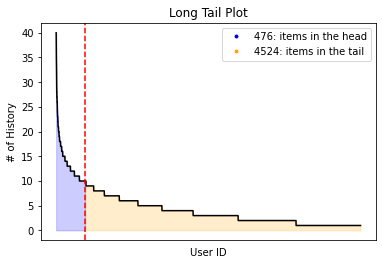

In [4]:
import recmetrics
recmetrics.long_tail_plot(
    df=data_behaviors,
    item_id_column='User ID',
    interaction_type = "History",
    percentage = 0.3,
    x_labels = False
)

In [ ]:
data_news["Clicks"] = 0

In [ ]:
import numpy as np
histories = data_behaviors["History"].unique()

for h in histories:
  if h is np.NaN:
    continue
  for split in h.split(" "):
    data_news.loc[data_news["News ID"] == split,"Clicks"] += 1

In [ ]:
val_count = data_news.value_counts(["Clicks"])

In [ ]:
plt.hist(data_news["Clicks"],[x for x in range(len(val_count)//5)])
plt.ylabel("#News with #Clicks")

plt.show()

In [8]:
npa = NRMSModel(hparams["npa"],MINDIterator,seed)
npa.fit(train_news_file, train_behaviors_file, valid_news_file, valid_behaviors_file)

2022-05-30 10:14:48.936956: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-30 10:14:49.046817: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:83:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-05-30 10:14:49.462087: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-05-30 10:14:49.612941: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-05-30 10:14:49.672282: I tensorflow/stream_executor/

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [ ]:
npa.model.save_weights("Saved_weights/","npa_weights")

In [ ]:
import wandb
wandb.login()
wandb.init(project ="Dummy" , name="Test_NRMS")



In [ ]:
nrms.fit(train_news_file,train_behaviors_file,valid_news_file,valid_behaviors_file)

In [ ]:
# Verify that loading was successful
rslts = nrms.run_eval(valid_news_file,valid_behaviors_file)

In [14]:
print(rslts)

{'group_auc': 0.6325, 'mean_mrr': 0.2894, 'ndcg@5': 0.3161, 'ndcg@10': 0.3839}


### Personalization

Was ist Personalization bei NRMs?

Prüfe inwieweit News Recommendations voneinander abweichen für gleiche Impressions aber unterschiedliche User (im Falle von NRMS bedeutet das, unterschiedliche User-Histories)

-------------

Macht es nur Sinn für personalisierende NRMs?


Das sind : NPA , DKN , FIM , LSTUR(?) (, FairRec)

In [11]:
nrms = NRMSModel(hparams["test"],MINDIterator,seed=42)

nrms.model.load_weights("Saved_weights/")

2022-06-06 15:54:40.948553: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-06 15:54:40.952672: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:83:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-06-06 15:54:40.952758: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-06-06 15:54:40.952819: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-06-06 15:54:40.952845: I tensorflow/stream_executor/

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [8]:
import random
from recommenders.models.newsrec.newsrec_utils import word_tokenize

# Use a string of news ids to get the titles and then get their dict entries from it
# -----
# hist :    Should be a string like "N11066 N27269 N8707 N5511 N18884 N4915 N15551 N425"
# news_df : Should be the Dataframe for the news
# word_dict:Should be the word dictionary ... can be generated with the given word dictionary file like iter.load_dict(wordDict_file)
def history_to_indexes(hist : str, news_df,word_dict,hist_size = 50,title_length = 30):
    split_str = hist.split(" ")
    rslt = np.zeros((1,50,30),dtype=int)    # 1 in Shape means that the batch size is here 1 
    for row in range(len(split_str)):
        s = split_str[row]
        title_words = news_df.loc[news_df["News ID"] == s]["Title"].to_string(index=False)  # Get the title for a news Id as string
        title_words = word_tokenize(title_words)    # Use proposed tokenizer
        for col in range(len(title_words)):
            # The iterator originally fills up data from back to from therefore we do the same
            if title_words[col] in word_dict:
                rslt[0][hist_size-(row + 1)][col] = int(word_dict[title_words[col]])
            else:
                rslt[0][hist_size-(row + 1)][col] = int(word_dict["."])
                
    
    return rslt


# Get different user and the corresponding history
def sample_different_history(user_dict : dict,current_user,behavs):
    rand_user = np.ones_like(current_user)

    rand = behavs['User ID'].sample().to_string(index=False)
    if user_dict[rand] == current_user.squeeze().squeeze():
        sample_different_history(user_dict,current_user)
    else:
        return rand,behavs.loc[behavs["User ID"] == rand]['History'][0:1].to_string(index=False)


In [9]:
from tqdm import tqdm
import numpy as np
iter = MINDIterator(hparams["test"], col_spliter="\t")
tqdm_util = tqdm(iter.load_data_from_file(valid_news_file, valid_behaviors_file))

0it [00:00, ?it/s]

In [13]:
# Usage of the above functions

# Sample a user which is not on the 42th index of the dict and get his history
r = sample_different_history(iter.load_dict(userDict_file),np.array([[42]]),data_behaviors_val)
print(r)

# Get the needed indexes for the history in shape (1,50,30)
sentence = r
history_to_indexes(sentence,data_news_val,iter.load_dict(wordDict_file))

N13996 N27967 N20175 N13890 N8256 N12558 N20668...


array([[[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        ...,
        [28292, 27286, 25863, ...,     0,     0,     0],
        [ 9886, 21375, 13247, ...,     0,     0,     0],
        [24235, 36510, 40313, ...,     0,     0,     0]]])

In [ ]:
for batch_data in tqdm_util:
    ### Batch enthält diese WErte
    ### dict_keys(['impression_index_batch', 'user_index_batch', 'clicked_title_batch', 'candidate_title_batch', 'labels'])

    # Enthält 2 User(Ids) mit je 16 Einträgen
    #print(batch_data['user_index_batch'])

    # Enthält 2 User(Ids) mit je 16 Einträgen
    # if counter == 20:
    #     break
    # print(counter)
    # counter = counter + 1
    

    # print("Impression index:")
    # print(batch_data['impression_index_batch'].shape)
    # print(batch_data['impression_index_batch'])

    # print("User index:")
    # print(batch_data['user_index_batch'].shape)
    # print(batch_data['user_index_batch'])

    # print("Clicked title:")
    # print(batch_data['clicked_title_batch'].shape)
    # print(batch_data['clicked_title_batch'])

    # print("label:")
    # print(batch_data['labels'].shape)
    # print(batch_data['labels'])

    # print("(---------------------)")

    eval_input, eval_label = nrms._get_input_label_from_iter(batch_data)
    # print("Eval input")
    #
    print(eval_input[0]) # eval_input[0] == batch_data['clicked_title_batch']
    print("(---------------------)")
    print(eval_input[1]) # eval_input[1] == batch_data['candidate_title_batch']

    rslt = nrms.scorer.predict_on_batch(eval_input)

    # print("resultat:")
    # print(rslt)

    # print(batch_data['labels'].shape)
    # imp_index = batch_data["impression_index_batch"]
    # print(imp_index)
    break


    




In [28]:
def will_get_clicked(prediction):
    if prediction[0] > 0.5:
        return 1
    else:
        return 0

In [62]:
first_loop = True

rslt_per_user = {}
diff_users = {}


num_diff_user = 10  # Number of users to compare with ---> HYPERPARAMETER
iterations = 1000 # Number of iterations (= Different news)  ---> HYPERPARAMETER

u_dict = iter.load_dict(userDict_file)
w_dict = iter.load_dict(wordDict_file)
news_df = data_news_val



for batch_data, idx in zip(tqdm_util,range(iterations)):
    current_user = batch_data['user_index_batch']

    # Sample num_diff_user(here = 10) users and their histories
    if first_loop:
        for u in range(num_diff_user+1):
            rslt_per_user[u] = list() # Setup a dict of results for each user
            new_user,new_hist = sample_different_history(u_dict,current_user,data_behaviors_val)
            diff_users[u+1] = history_to_indexes(new_hist,news_df,w_dict)


        first_loop = False
    

    

    eval_input, eval_label = nrms._get_input_label_from_iter(batch_data)
    rslt = nrms.scorer.predict_on_batch(eval_input)

    rslt_per_user[0].append(will_get_clicked(rslt))
    for u in range(1,num_diff_user+1):
        # prediciton for each different user
        eval_input[0] = diff_users[u]
        rslt = nrms.scorer.predict_on_batch(eval_input)
        rslt_per_user[u].append(will_get_clicked(rslt))
    


In [ ]:
for u in range(num_diff_user+1):
    print(f"User {u}: {rslt_per_user[u]}")

In [64]:
# Berechnet wie viel Prozent Übereinstimmmung pro Nutzer zu den anderen Nutzern sind
similarity = 0
for u1 in range(num_diff_user+1):
    for u2 in range(num_diff_user+1):
        if u1 == u2:
            continue
        for i in range(iterations):
            if((rslt_per_user[u1][i] == rslt_per_user[u2][i]) and rslt_per_user[0][i] == 1):
                similarity += 1
    print(f"User {u1} Average sim: {similarity/(num_diff_user *iterations)}")
    similarity = 0



User 0 Average sim: 0.2575
User 1 Average sim: 0.2831
User 2 Average sim: 0.2874
User 3 Average sim: 0.2756
User 4 Average sim: 0.2764
User 5 Average sim: 0.2789
User 6 Average sim: 0.2777
User 7 Average sim: 0.2785
User 8 Average sim: 0.2856
User 9 Average sim: 0.2695
User 10 Average sim: 0.2376


In [100]:
data_behaviors.loc[data_behaviors["Impression ID"] == 1]

,Impression ID,User ID,Time,History,Impressions
0,1,U82271,11/11/2019 3:28:58 PM,N3130 N11621 N12917 N4574 N12140 N9748,N13390-0 N7180-0 N20785-0 N6937-0 N15776-0 N25...


In [38]:
word_d = iter.load_dict(hparams["test"].wordDict_file)

tst  = [16185,3104,20133,34745,122,12797,34948,14797,1386,18145,4906,12797,9675,28515,24522]

print(word_d["annualized"])
for t in tst:
    for k in word_d.items():
        if k[1] == t:
            print(k[0],end=" ")
            break

1
3 indiana judges suspended after a night of drinking turned into a white castle brawl 

In [56]:
data_behaviors.head()

,Impression ID,User ID,Time,History,Impressions
0,2,U84185,11/12/2019 10:36:47 AM,N27209 N11723 N4617 N12320 N11333 N24461 N2211...,N13089-0 N18101-0 N1248-0 N26273-0 N12770-1 N1...
1,3,U11552,11/11/2019 1:03:52 PM,N2139,N18390-0 N10537-0 N23967-1
2,4,U68381,11/11/2019 6:44:05 AM,N27420 N11621 N25416 N25457 N5124 N11751 N1175...,N15660-0 N18609-0 N2831-0 N5677-0 N19010-0 N15...
3,5,U52303,11/12/2019 3:11:52 AM,N1332 N12667,N15645-0 N7911-1
4,6,U26536,11/11/2019 3:13:36 PM,N17674 N7165 N18669 N20855 N9748 N44 N24245 N2...,N15244-0 N2167-0 N20122-0 N16945-0 N9480-0 N36...


In [9]:
data_news.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N10399,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://www.msn.com/en-us/news/world/the-cost-...,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
1,N12103,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://www.msn.com/en-us/health/voices/i-was-...,[],"[{""Label"": ""National Basketball Association"", ..."
2,N20460,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://www.msn.com/en-us/health/medical/how-t...,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
3,N5409,weather,weathertopstories,It's been Orlando's hottest October ever so fa...,There won't be a chill down to your bones this...,https://www.msn.com/en-us/weather/weathertopst...,"[{""Label"": ""Orlando, Florida"", ""Type"": ""G"", ""W...","[{""Label"": ""Orlando, Florida"", ""Type"": ""G"", ""W..."
4,N21078,entertainment,gaming,Best PS5 games: top PlayStation 5 titles to lo...,Every confirmed or expected PS5 game we can't ...,https://www.msn.com/en-us/entertainment/gaming...,"[{""Label"": ""PlayStation"", ""Type"": ""J"", ""Wikida...",[]


In [32]:
data_behaviors.head()


,Impression ID,User ID,Time,History,Impressions
0,2,U84185,11/12/2019 10:36:47 AM,N27209 N11723 N4617 N12320 N11333 N24461 N2211...,N13089-0 N18101-0 N1248-0 N26273-0 N12770-1 N1...
1,3,U11552,11/11/2019 1:03:52 PM,N2139,N18390-0 N10537-0 N23967-1
2,4,U68381,11/11/2019 6:44:05 AM,N27420 N11621 N25416 N25457 N5124 N11751 N1175...,N15660-0 N18609-0 N2831-0 N5677-0 N19010-0 N15...
3,5,U52303,11/12/2019 3:11:52 AM,N1332 N12667,N15645-0 N7911-1
4,6,U26536,11/11/2019 3:13:36 PM,N17674 N7165 N18669 N20855 N9748 N44 N24245 N2...,N15244-0 N2167-0 N20122-0 N16945-0 N9480-0 N36...


In [51]:
data_behaviors.loc[175]

Impression ID                                                  177
User ID                                                     U12564
Time                                         11/10/2019 1:27:09 PM
History          N12364 N25470 N11915 N24141 N4617 N21543 N1514...
Impressions                                      N18110-0 N22990-1
Name: 175, dtype: object

# Performance on different Histories

In diesem Abschnitt soll überprüft werden, inwieweit History die Performance verbessert.\\
Im ersten Abschnitt wird geprüft inwieweit die History-Länge die Performance verändert. Dafür schränke ich die Längen auf 10/20/30/... ein.

Im zweiten Abschnitt ob sich die Performance verschlechtert wenn mit neueren/älteren Einträgen der History trainiere. 

**!! Verwendung von Dataset MIND_small**

**Vorher Load MIND - Dataset (SMALL) ausführen**
[click here](#load_small)


In [1]:
global shrink_size
shrink_size = 20

def apply_shrink(x):
    if x is np.nan:
        return ""
    split_x = x.split(" ")
    if len(split_x) >= shrink_size:
        return ' '.join(split_x[:shrink_size])


# Shrink each history to max. n entries --> Return: Path to the saved file
def shrink_history_to_n(n,df):
    shrink_size = n
    copy_data = df.copy(deep=True)

    copy_data["History"] = copy_data["History"].apply(apply_shrink)

    copy_data.to_csv(f"Dataset_small/Changed_histories/behaviors_hist_{shrink_size}.tsv",sep="\t",index=False)

    return os.path.join("Dataset_small","Changed_histories",f"behaviors_hist_{shrink_size}.tsv")

    



First change MIND-Dataset according to different History-Sizes

In [ ]:
from recommenders.models.newsrec.models.nrms import NRMSModel
from recommenders.models.newsrec.io.mind_iterator import MINDIterator
from recommenders.models.newsrec.newsrec_utils import prepare_hparams

import wandb
wandb.login()

yaml_file = os.path.join(data_path, "utils", r'nrms.yaml')

epochs = 5
history_size = 50
batch_size = 100


hparams= prepare_hparams(yaml_file, 
                          wordEmb_file=wordEmb_file,
                          wordDict_file=wordDict_file, 
                          userDict_file=userDict_file,
                          vertDict_file=vertDict_file, 
                          subvertDict_file=subvertDict_file,
                          batch_size=batch_size,
                          epochs=epochs)


for i in range(10,51,10):
    wandb.init(project="Different_histories_NRMS",name=f"|History| = {i}",reinit=True)
    nrms = NRMSModel(hparams,MINDIterator,42)

    wandb.log(nrms.run_eval(valid_news_file,valid_behaviors_file))
    nrms.fit(train_news_file, shrink_history_to_n(i,pd.read_csv(train_behaviors_file,sep="\t")), valid_news_file, valid_behaviors_file)

    wandb.finish()




In [19]:
from loading_utils import get_dataframe

test_beh = get_dataframe("test")
valid_news = get_dataframe("train",False)

In [ ]:
# Versichere dass die News der Test behaviors auch in dem Valid Newsset sind
for  hist in test_beh["History"].head():
    hist_split = hist.split(' ')
    for s in hist_split:
        print(len(valid_news.loc[valid_news['News ID'] == s]))
            


Tests starten hier : benötigte Importe

In [1]:
import os
import sys

import numpy as np
import tensorflow as tf
import pandas as pd

import recommenders_tests

2022-07-18 10:43:02.660087: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
# Tests wieso History size keinen Einfluss auf NRMS hat

# 1. Datensätze verwenden keine verkleinerte History
data_path = "Dataset_small"

train_behaviors_file = os.path.join(data_path, 'train', r'behaviors.tsv')
print(train_behaviors_file)
orig_behav = pd.read_csv(train_behaviors_file,sep="\t",names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])


changed_behav_file = recommenders_tests.shrink_history_to_n(2,orig_behav)
print(changed_behav_file)

changed_behav = pd.read_csv(changed_behav_file,sep="\t",names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])
# orig_behav.head()

# for orig,changed in zip(orig["History"].head(),changed_behav["History"].head()):
#     print(f"Original/Changed length : {len(orig.split(' '))}/{len(changed.split(' '))}")

/home/langenhagen/Masterthesis/Masterarbeit/Dataset_small/train/behaviors.tsv


TypeError: argument of type 'method' is not iterable

In [22]:
changed_behav.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,NaN,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,NaN,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,NaN,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,NaN,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


Tests on why the test set results are the same as the valid sets results

In [4]:
import pandas as pd 

test_set = pd.read_csv("Dataset_small/test/behaviors.tsv",sep="\t",names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])
valid_set = pd.read_csv("Dataset_small/valid/behaviors.tsv",sep="\t",names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])


In [5]:
test_set.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U107107,11/15/2019 5:50:31 AM,N12959 N8085 N18389 N3758 N9740 N90543 N129790...,N122944-1 N18190-0 N55801-0 N59297-0 N128045-0...
1,2,U657892,11/15/2019 8:30:04 AM,N66666 N88230 N105366 N67497,N64785-0 N130076-0 N30532-0 N29016-0 N30582-0 ...
2,3,U224919,11/15/2019 2:14:20 PM,N69106 N87211 N71082 N47193 N13423 N49262 N395...,N39770-0 N89441-0 N46641-0 N92476-0 N24165-0 N...
3,4,U729408,11/15/2019 9:30:39 AM,N56531 N92279 N123189 N23891 N84063 N125940 N1...,N27669-0 N96351-0 N70883-0 N127089-0 N39770-0 ...
4,5,U749852,11/15/2019 4:10:27 PM,N107944 N121133 N87437 N128643 N58992 N56920 N...,N19831-0 N64957-0 N39770-0 N28863-0 N126696-0 ...


In [14]:
for u in test_set['User ID']:
    if len(valid_set['User ID'].loc[valid_set['User ID'] == u]) == 0:
        print('User vorhanden')
        break

User vorhanden


In [15]:
import plotly.graph_objects as go

In [18]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='Control',
    x=['Trial 1', 'Trial 2', 'Trial 3'], y=[3, 6, 4],
    error_y=dict(type='data', array=[1, 0.5, 1.5])
))
fig.add_trace(go.Bar(
    name='Experimental',
    x=['Trial 1', 'Trial 2', 'Trial 3'], y=[4, 7, 3],
    error_y=dict(type='data', array=[4, 4, 4])
))
fig.update_layout(barmode='group')
fig.show()

# Tests

In [2]:
import os
import sys

# ! Before importing tensorflow set devices (-1 for NO GPU Acceleration)
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import tensorflow as tf
from recommenders_tests import load_small

2022-08-09 21:42:36.983727: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


KeyboardInterrupt: 

In [2]:
from recommenders.models.newsrec.models.nrms import NRMSModel
from recommenders.models.newsrec.io.mind_iterator import MINDIterator
from recommenders.models.newsrec.newsrec_utils import prepare_hparams

In [1]:
train_news_file,train_behaviors_file,valid_news_file,valid_behaviors_file,wordEmb_file,userDict_file,wordDict_file,vertDict_file,subvertDict_file = load_small()
yaml_file = os.path.join("Dataset_small", "utils", r'nrms.yaml')

test_behaviors_file="Dataset_small/test/behaviors.tsv"

hparams= prepare_hparams(yaml_file, 
                        wordEmb_file=wordEmb_file,
                        wordDict_file=wordDict_file, 
                        userDict_file=userDict_file,
                        vertDict_file=vertDict_file, 
                        subvertDict_file=subvertDict_file,
                        batch_size=1,
                        epochs=1)

nrms = NRMSModel(hparams,MINDIterator,42)



NameError: name 'load_small' is not defined

In [4]:
nrms.model.load_weights("Save_models/NRMS_weights_hist_25/")

In [13]:
import pandas as pd
# TODO Hier weitermachen


test_behaviors_file = "Dataset_small/test/behaviors.tsv"
test_news_file = "Dataset_small/test/news.tsv"

behav_df = pd.read_csv(test_behaviors_file,delimiter="\t",header=None)


nrms.test_iterator.init_news(test_news_file)
results = []

for i in range(10):
    behav_df.iloc[i:i+1].to_csv("tmp/tmp_behav.tsv", sep="\t", index=False, header=False)
    new_behav = "tmp/tmp_behav.tsv"


    nrms.test_iterator.init_behaviors(behaviors_file = new_behav)
    results.append(nrms.run_eval(test_news_file,new_behav))
    print(results[i])



3661it [00:09, 399.92it/s]
1it [00:00, 153.82it/s]
1it [00:00, 802.43it/s]


{'group_auc': 0.6875, 'mean_mrr': 0.3333, 'ndcg@5': 0.3869, 'ndcg@10': 0.6053}


3661it [00:09, 401.71it/s]
1it [00:00, 171.95it/s]
1it [00:00, 623.22it/s]


{'group_auc': 0.3509, 'mean_mrr': 0.0263, 'ndcg@5': 0.0, 'ndcg@10': 0.0}


3661it [00:09, 405.90it/s]
1it [00:00, 169.14it/s]
1it [00:00, 332.17it/s]


{'group_auc': 0.9174, 'mean_mrr': 0.1, 'ndcg@5': 0.0, 'ndcg@10': 0.2891}


3661it [00:09, 403.48it/s]
1it [00:00, 163.83it/s]
1it [00:00, 613.56it/s]


{'group_auc': 1.0, 'mean_mrr': 1.0, 'ndcg@5': 1.0, 'ndcg@10': 1.0}


3661it [00:09, 404.90it/s]
1it [00:00, 121.88it/s]
1it [00:00, 654.34it/s]


{'group_auc': 0.1795, 'mean_mrr': 0.0303, 'ndcg@5': 0.0, 'ndcg@10': 0.0}


3661it [00:09, 404.42it/s]
1it [00:00, 171.32it/s]
1it [00:00, 1874.13it/s]


{'group_auc': 0.75, 'mean_mrr': 0.5, 'ndcg@5': 0.6309, 'ndcg@10': 0.6309}


3661it [00:09, 403.93it/s]
1it [00:00, 164.26it/s]
1it [00:00, 1592.37it/s]


{'group_auc': 0.8, 'mean_mrr': 0.3333, 'ndcg@5': 0.5, 'ndcg@10': 0.5}


3661it [00:09, 402.56it/s]
1it [00:00, 184.86it/s]
1it [00:00, 1621.93it/s]


{'group_auc': 0.4, 'mean_mrr': 0.1429, 'ndcg@5': 0.0, 'ndcg@10': 0.3333}


3661it [00:09, 400.63it/s]
1it [00:00, 165.25it/s]
1it [00:00, 1800.13it/s]


{'group_auc': 1.0, 'mean_mrr': 0.75, 'ndcg@5': 1.0, 'ndcg@10': 1.0}


3661it [00:09, 405.84it/s]
1it [00:00, 163.74it/s]
1it [00:00, 1789.38it/s]

{'group_auc': 0.5, 'mean_mrr': 0.5, 'ndcg@5': 0.6309, 'ndcg@10': 0.6309}


In [5]:
nrms.fit(train_news_file, train_behaviors_file, valid_news_file, valid_behaviors_file, valid_news_file,track_wand=False)

0it [00:00, ?it/s]2022-08-08 22:48:45.026276: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
1it [00:11, 11.21s/it]


KeyboardInterrupt: 

In [8]:
results_fast = nrms.run_fast_eval(valid_news_file,valid_behaviors_file)

1326it [00:02, 581.45it/s]
2286it [00:47, 48.39it/s]
73152it [00:14, 5071.25it/s]


In [1]:
import scipy
from recommenders.evaluation.python_evaluation import auc

print(results_fast[1][19])

print(scipy.special.softmax(results_fast[2][19]))

ModuleNotFoundError: No module named 'recommenders.evaluation'

In [21]:
v_b = pd.read_csv(valid_behaviors_file,sep='\t',header=None)
v_b.columns = ['Impression ID', 'User ID', 'Time', 'History' , 'Impressions']



In [37]:
v_b['Impressions'].iloc[2].split(' ')

['N36779-0',
 'N62365-0',
 'N58098-0',
 'N5472-0',
 'N13408-0',
 'N55036-0',
 'N19990-0',
 'N53283-0',
 'N20036-0',
 'N47383-0',
 'N37352-0',
 'N31958-0',
 'N50775-0',
 'N5940-1',
 'N58251-0',
 'N49285-0',
 'N30290-0',
 'N11930-0',
 'N16680-0',
 'N42844-0',
 'N53572-0',
 'N6916-0',
 'N55237-0']

In [15]:
# results_fast[1]
results_fast[2]

[array([-0.10228381,  0.1559366 , -0.09345074, -0.10740464, -0.22288032,
         0.02995714, -1.4009058 ,  0.20210943,  0.23144557, -0.7760229 ,
         0.3571967 ,  0.5850246 , -0.8653462 , -0.5603694 ,  0.9317423 ,
        -0.27832782, -0.01028161,  0.39942682, -1.1331892 , -0.23379698,
         0.14073935, -0.5375874 ], dtype=float32),
 array([ 0.36224014,  0.20703103, -0.28175408, -0.43841392,  0.5230376 ,
        -0.32085067,  0.06129698], dtype=float32),
 array([-0.19837348,  0.36152154,  0.02419112,  1.61671   , -0.7620684 ,
        -0.67259455, -0.16831458, -0.60864127,  0.02029827,  0.6691874 ,
        -0.4317171 ,  0.9620527 , -1.4459751 , -0.67733985, -0.33967775,
        -0.6225858 ,  1.6020359 ,  0.01030059, -1.4259337 ,  0.9685105 ,
         0.5198843 ,  0.9338452 ,  0.15358642], dtype=float32),
 array([-0.50703037,  0.32273138, -0.67669296, -0.9759152 , -0.35060522,
         0.05047668, -0.56976056, -1.1024499 , -0.03178522,  0.28164738,
        -0.57879263,  0.8481083

In [18]:
small_valid.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N18955,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [16]:
import pandas as pd

test_behav =  pd.read_csv(test_behaviors_file,sep="\t",names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])

Das Newsfile muss für das Testfile angepasst werden

In [4]:
def is_in(df, query):
    return len(df.loc[df['News ID'] == query]) > 0

In [17]:

large_valid = pd.read_csv("MINDlarge_train.zip/valid/news.tsv",sep='\t',header=None)
large_valid.columns=['News ID',
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities",
"Abstract Entities "]

large_train = pd.read_csv("MINDlarge_train.zip/train/news.tsv",sep='\t',header=None)
large_train.columns=['News ID',
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities",
"Abstract Entities "]

small_train = pd.read_csv("Dataset_small/train/news.tsv",sep='\t',header=None)
small_train.columns=['News ID',
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities",
"Abstract Entities "]

small_valid = pd.read_csv("Dataset_small/valid/news.tsv",sep='\t',header=None)
small_valid.columns=['News ID',
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities",
"Abstract Entities "]



In [6]:
import numpy as np
# Use all the news ids which are used in the test behaviors histories
needed_idx = [] 

for h,i in zip(test_behav['History'],test_behav['Impressions']):
    if h is np.nan or i is np.nan:
        continue
    for s in h.split(' '):
        if s not in needed_idx:
            needed_idx.append(s)
    for s2 in i.split(' '):
        if s2.split('-')[0] not in needed_idx:
            needed_idx.append(s)

In [8]:
vlarge = pd.concat([large_train,large_valid,small_train,small_valid]).drop_duplicates()



In [18]:
print(len(needed_idx))

37820


In [21]:
vlarge_only_needed = vlarge.loc[vlarge['News ID'].isin(needed_idx)].copy(deep=True)

print(len(vlarge_only_needed))

56689


In [28]:
is_in(vlarge,'N122944')

True

In [42]:
vlarge_only_needed.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
1,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
3,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
4,N75236,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
5,N99744,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [22]:
vlarge_only_needed['Abstract'] = vlarge_only_needed['Abstract'].str.replace('\t',' ')
vlarge_only_needed['Title'] = vlarge_only_needed['Title'].str.replace('\t',' ')

In [9]:
# vlarge = pd.concat([large_train,large_valid,small_train,small_valid]).drop_duplicates()
# print(len(vlarge))



# vlarge.loc[vlarge['News ID'].isin(outliers)]['Abstract'] = vlarge[vlarge['News ID'].isin(outliers)]['Abstract'].replace('\t',' ')
vlarge['Abstract'] = vlarge['Abstract'].str.replace('\t',' ')
vlarge['Title'] = vlarge['Title'].str.replace('\t',' ')
print(len(vlarge))


169388


In [10]:
from pathlib import Path
filepath = Path('Dataset_small/test/news.tsv')
vlarge.to_csv(filepath,sep='\t',index=False,header=False)

In [25]:
nd = pd.read_csv("Dataset_small/test/news.tsv",sep='\t')
nd.columns=['News ID',
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities",
"Abstract Entities "]

In [41]:
nd[nd['News ID'].isin(outliers)]['Abstract'].str.find('\t')


4662       17
38160      -1
46234     123
48764      -1
63747      -1
100953    354
Name: Abstract, dtype: int64

In [48]:
'N122944' in needed_idx

False

In [39]:
large_valid.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
1,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
2,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N75236,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N99744,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


Test ob testset funktioniert

In [11]:
new_test_news = "Dataset_small/test/news.tsv"

nrms.test_iterator.init_news(new_test_news)
nrms.test_iterator.init_behaviors(behaviors_file=test_behaviors_file)
print(nrms.run_eval(new_test_news,test_behaviors_file))

0it [00:00, ?it/s]/home/langenhagen/miniconda3/envs/tf_newsrec/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
3661it [00:49, 74.01it/s]
2303it [18:34,  2.07it/s]
73677it [00:12, 5840.68it/s]


{'group_auc': 0.5024, 'mean_mrr': 0.218, 'ndcg@5': 0.222, 'ndcg@10': 0.2869}


In [11]:
with tf.io.gfile.GFile("Dataset_small/test/news.tsv", "r") as rd:
    for line in rd:
        if len(line.strip("\n").split('\t')) != 8:
            for l in line.strip("\n").split('\t'):
                print(l)
                break


N110434
N74207
N113363
N118418
N102010
N45635


# T-Test

In [34]:
import numpy as np
# https://www.statisticshowto.com/probability-and-statistics/t-test/#:~:text=Paired%20Samples%20T%20Test%20By%20hand
def paired_t_test(X_,Y_):
    diff = X_ - Y_

    squared_diff = np.square(diff)

    print(squared_diff)
    
    sum_squared_diff = np.sum(squared_diff)
    print(sum_squared_diff)
    sum_diff = np.sum(diff)
    print(sum_diff)
    n = len(X_)

    denom = (sum_diff/n)
    nom = sum_squared_diff - (sum_diff*sum_diff)/2
    print(nom)
    nom = nom / ((n-1) * n)
    t =  denom / np.sqrt(nom)

    return t

def t_test(X_,Y_):
    
    sum_x = np.sum(X_)
    sum_y = np.sum(Y_)

    squared_sum_x = np.square(sum_x)
    squared_sum_y = np.square(sum_y)

    mean_x = np.mean(X_)
    mean_y = np.mean(Y_)

    square_x = np.sum([np.square(x) for x in X_])
    square_y = np.sum([np.square(y) for y in Y_])

    denom = mean_x - mean_y

    nom = (((square_x - squared_sum_x/len(X_)) + (square_y - squared_sum_y/len(Y_))) / (len(X_) + len(Y_) - 2)) * (1/len(X_) + 1/len(Y_))

    t = denom/np.sqrt(nom)
    return t



In [58]:
import pandas as pd
df1 = pd.read_csv('Metric_scores/NRMS_SEED_42_HIST_10',header=None)
df2 = pd.read_csv('Metric_scores/NRMS_SEED_42_HIST_100',header=None)



In [59]:
df1.columns = ["IDX","AUC","Acc"]
df2.columns = ["IDX","AUC","Acc"]


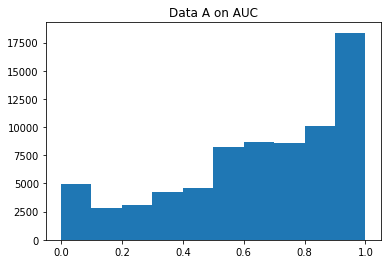

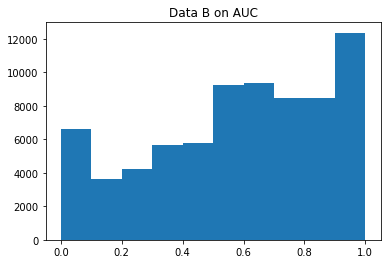

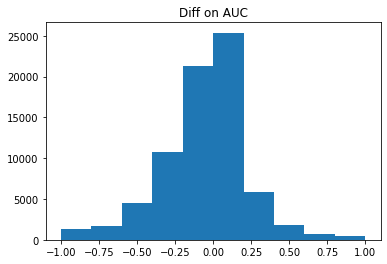

In [123]:
# Plot data
import matplotlib.pyplot as plt

plt.hist(df1['AUC'])
plt.title("Data A on AUC")
plt.show()

plt.hist(df2['AUC'])
plt.title("Data B on AUC")
plt.show()

plt.hist(df2['AUC'] - df1['AUC'])
plt.title("Diff on AUC")
plt.show()

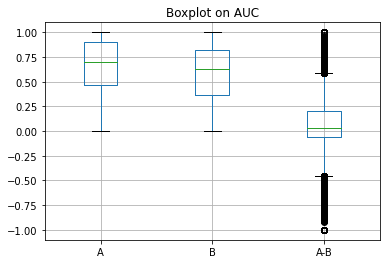

In [161]:

results = pd.DataFrame()
results['A'] = df1['AUC']
results['B'] = df2['AUC']
results['A-B'] = (df1['AUC'] - df2['AUC'])
results.boxplot()
plt.title("Boxplot on AUC")
plt.show()

In [154]:
print(results.describe())


                  A             B           A-B
count  73677.000000  73677.000000  73677.000000
mean       0.649532      0.582424      0.067108
std        0.291863      0.295571      0.280828
min        0.000000      0.000000     -1.000000
25%        0.464286      0.363636     -0.060000
50%        0.703704      0.625000      0.034632
75%        0.898551      0.822034      0.200000
max        1.000000      1.000000      1.000000


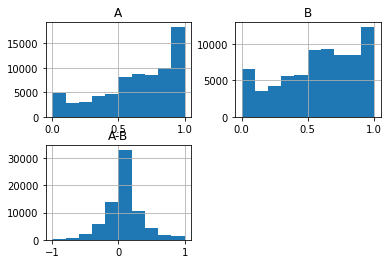

In [155]:
results.hist()
plt.show()

In [159]:
from scipy.stats import normaltest

print(normaltest(df2['AUC']))
print(normaltest(df1['AUC']))
print(normaltest(df2['Acc']))
print(normaltest(df1['Acc']))


NormaltestResult(statistic=9304.961277981336, pvalue=0.0)
NormaltestResult(statistic=6194.137620154172, pvalue=0.0)
NormaltestResult(statistic=61434.66106616378, pvalue=0.0)
NormaltestResult(statistic=64674.48658250194, pvalue=0.0)


In [160]:
# Test for non-Gaussian 
from scipy.stats import ks_2samp

v,p = ks_2samp(results['A'],results['B'])
print(f"Statistic : {v}, Pval : {p}")
if p > 0.05:
    print("Probably same distribution")
else:
    print("Probably different distribution -> Results are significant")

Statistic : 0.10604394858639743, Pval : 0.0
Probably different distribution -> Results are significant


In [114]:
# https://medium.com/analytics-vidhya/using-the-corrected-paired-students-t-test-for-comparing-the-performance-of-machine-learning-dc6529eaa97f
def ttest_mod(RFC_score, SVM_score):
    #Compute the difference between the results
    diff = [y - x for y, x in zip(RFC_score, SVM_score)]
    #Comopute the mean of differences
    d_bar = np.mean(diff)
    #compute the variance of differences
    sigma2 = np.var(diff,ddof=1)
    #compute the number of data points used for training 
    n1 = len(RFC_score)
    #compute the number of data points used for testing 
    n2 = len(RFC_score)
    #compute the total number of data points
    n = len(RFC_score)
    #compute the modified variance
    sigma2_mod = sigma2 * (1/n + n2/n1)
    #compute the t_static
    t_static =  d_bar / np.sqrt(sigma2_mod)
    from scipy.stats import t
    #Compute p-value and plot the results 
    Pvalue = ((1 - t.cdf(t_static, n-1))*2)
    return t_static, Pvalue

In [115]:
tval = ttest_mod(df1['AUC'],df2['AUC'])
# print(((1 - t.cdf(ttest_mod(df1['Acc'],df2['Acc'])[0], len(df1)-1))*200))
print(f"T,P : {tval}")




T,P : (0.23896451478526917, 0.8111337634319189)


In [62]:

t_test(df1['Acc'].to_numpy(),df2['Acc'].to_numpy())

8.174846628685508

In [52]:
df1.head()

,IDX,Acc,AUC
0,0,0.625000,0.800000
1,1,0.666667,0.982759
2,2,0.935780,0.990909
3,3,0.975610,0.987952
4,4,0.692308,0.975000


In [4]:
from ranx import Qrels, Run

In [ ]:
Qrels.from_df(df1)

In [ ]:
X_ = df1["AUC"].to_numpy()
Y_ = df2["AUC"].to_numpy()

t_test

In [47]:
from scipy.stats import ttest_rel
from scipy.stats import t

tscore, pvalue = ttest_rel(df1['AUC'], df2['AUC'])
print("t Statistic: ", tscore)

# P value is the are of the two sided curve
print("P Value: ", pvalue)

t Statistic:  14.528104340830474
P Value:  9.3644509438554e-48


In [57]:
df1['Acc'].head()

0    0.625000
1    0.666667
2    0.935780
3    0.975610
4    0.692308
Name: Acc, dtype: float64

In [56]:
df2['Acc'].head()


0    0.750000
1    0.578947
2    0.577982
3    0.743902
4    0.410256
Name: Acc, dtype: float64

# Attention visualisation

In [1]:
import os
import sys

os.environ["CUDA_VISIBLE_DEVICES"]="2"
sys.path.insert(0,"recommenders")

import numpy as np
#import tensorflow as tf
import pandas as pd

from recommenders.models.newsrec.models.nrms import NRMSModel

import wandb
from recommenders.models.deeprec.deeprec_utils import \
    download_deeprec_resources
from recommenders.models.newsrec.io.mind_iterator import MINDIterator
from recommenders.models.newsrec.newsrec_utils import (get_mind_data_set,
                                               prepare_hparams)

2022-12-12 04:10:05.860694: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [14]:
from recommenders_tests import load_small
from loading_utils import from_idx_to_UID,from_idx_to_words

train_news_file,train_behaviors_file,valid_news_file,valid_behaviors_file,wordEmb_file,userDict_file,wordDict_file,vertDict_file,subvertDict_file = load_small()
yaml_file = os.path.join("Dataset_small", "utils", r'nrms.yaml')

test_behaviors_file="Dataset_small/test/behaviors.tsv"

hparams= prepare_hparams(yaml_file, 
                        wordEmb_file=wordEmb_file,
                        wordDict_file=wordDict_file, 
                        userDict_file=userDict_file,
                        vertDict_file=vertDict_file, 
                        subvertDict_file=subvertDict_file,
                        batch_size=32,
                        his_size = 100,
                        epochs=1)

iterator = MINDIterator
nrms = NRMSModel(hparams,iterator,42)


train_news_file = "Dataset_small/test/news.tsv"
train_behaviors_file = "Dataset_small/Users_with_n_behaviors/behaviors.tsv"


# nrms, results = nrms.fit(train_news_file, train_behaviors_file, valid_news_file, valid_behaviors_file, valid_news_file,track_wand=False,results_as_list = True)

nrms.model.load_weights(f"Save_models/NRMS_weights_hist_100/")

2022-12-12 04:26:45.537142: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-12 04:26:45.539197: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:82:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-12-12 04:26:45.539434: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-12-12 04:26:45.539630: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-12-12 04:26:45.539781: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-12-12 04:26:45.539925: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuff

Input shape: (None, None, 400)
Attention weights: Tensor("att_layer2_4/ExpandDims:0", shape=(None, None, 1), dtype=float32)
Input shape: (None, None, 400)
Attention weights: Tensor("time_distributed_4/news_encoder/att_layer2_4/ExpandDims:0", shape=(None, None, 1), dtype=float32)
Input shape: (None, None, 400)
Attention weights: Tensor("time_distributed_4/att_layer2_4/ExpandDims:0", shape=(None, None, 1), dtype=float32)
Input shape: (None, None, 400)
Attention weights: Tensor("att_layer2_5/ExpandDims:0", shape=(None, None, 1), dtype=float32)
Input shape: (None, None, 400)
Attention weights: Tensor("user_encoder_2/time_distributed_4/news_encoder/att_layer2_4/ExpandDims:0", shape=(None, None, 1), dtype=float32)
Input shape: (None, None, 400)
Attention weights: Tensor("user_encoder_2/time_distributed_4/att_layer2_4/ExpandDims:0", shape=(None, None, 1), dtype=float32)
Input shape: (None, None, 400)
Attention weights: Tensor("user_encoder_2/att_layer2_5/ExpandDims:0", shape=(None, None, 1), 

---START : Step by step predictions ----

In [3]:
nrms.userencoder.layers[1].weights

[<tf.Variable 'embedding/embeddings:0' shape=(60993, 300) dtype=float32>,
 <tf.Variable 'self_attention/WQ:0' shape=(300, 400) dtype=float32>,
 <tf.Variable 'self_attention/WK:0' shape=(300, 400) dtype=float32>,
 <tf.Variable 'self_attention/WV:0' shape=(300, 400) dtype=float32>,
 <tf.Variable 'att_layer2/W:0' shape=(400, 200) dtype=float32>,
 <tf.Variable 'att_layer2/b:0' shape=(200,) dtype=float32>,
 <tf.Variable 'att_layer2/q:0' shape=(200, 1) dtype=float32>]

In [15]:
from tqdm import tqdm
import tensorflow as tf
import seaborn as sns
K = tf.keras.backend

# from model_utils import get_attention_nrms ,visualize_attention

class CharVal(object):
    def __init__(self, char, val):
        self.char = char
        self.val = val

    def __str__(self):
        return str(self.char) # TODO funktioniert noch nicht so wie sie soll sie print(char_df)

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

def color_charvals(s):
    r = 255-int(s.val*255)
    print(r)
    color = rgb_to_hex((255, r, r))
    return 'background-color: %s' % color


def get_attention_nrms(model : NRMSModel,user_input):

    # Input runs to the two first layers
    inputs = model.userencoder.layers[0](user_input)
    inputs = model.userencoder.layers[1](inputs)

    # Weights for attention mechanism
    w_ = model.userencoder.layers[1].weights[4]
    b_ = model.userencoder.layers[1].weights[5]
    q_ = model.userencoder.layers[1].weights[6]

    # tanh(w.x + b) . q
    attention = K.tanh(K.dot(inputs, w_) + b_)
    attention = K.dot(attention, q_)

    attention = K.squeeze(attention, axis=2)

    # Mask out every padding news titel e.g. User has history size 12 and max history size is 100 than the first 88 values are masked out
    assert len(user_input.shape) == 3 , print("User input has to be of shape (batchsize, max_hist_size, max_title_size)")
    mask = np.count_nonzero(user_input != 0,axis=2)
    mask = mask != 0
    if mask is None:
            attention = K.exp(attention)
    else:
            attention = K.exp(attention) * K.cast(mask, dtype="float32")
    
    # Attention weights are basically probabilies 
    attention = K.exp(attention)

    attention_weight = attention / (
        K.sum(attention, axis=-1, keepdims=True) + K.epsilon()
    )
    
    attention_weight = K.expand_dims(attention_weight)

    return attention,attention_weight

def visualize_attention(scores_mat : np.array):
    fig = plt.figure(figsize=(20, 20))

    # print(scores_mat.shape)
    # scores_mat = np.expand_dims(scores_mat,axis=1)
    # scores_mat = np.expand_dims(scores_mat,axis=1)
    # print(scores_mat.shape)
    for idx, scores in enumerate(scores_mat):
        scores_np = np.array(scores)
        ax = fig.add_subplot(4, 3, idx+1)
        # append the attention weights
        im = ax.imshow(scores, cmap='viridis')

        fontdict = {'fontsize': 10}

        ax.set_xticks(range(len(scores_mat)))
        ax.set_yticks(range(len(scores_mat)))

        ax.set_xticklabels(scores_mat, fontdict=fontdict, rotation=90)
        ax.set_yticklabels(scores_mat, fontdict=fontdict)
        ax.set_xlabel('{} {}'.format(scores_mat, idx+1))

        fig.colorbar(im, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()


for batch_data_input in tqdm(
            nrms.test_iterator.load_user_from_file(valid_news_file, valid_behaviors_file)
        ):
        # Batch
        # for k in batch_data_input.keys():
        #     print(k)
        # print(batch_data_input['user_index_batch'])
        # for i in range(batch_data_input['clicked_title_batch'].shape[1]):
        #     if batch_data_input['clicked_title_batch'][0][i].any() != 0:
        #         print(batch_data_input['clicked_title_batch'][0][i])
        # print(batch_data_input['clicked_title_batch'])

        # batch_data_input['clicked_title_batch']
        with tf.compat.v1.Session() as sess:
            init = tf.compat.v1.global_variables_initializer()
            sess.run(init)
            user_input = nrms._get_user_feature_from_iter(batch_data_input)
            
            # 1 x his_size x 30 
            # batchsize x history x titlelenght
            # Dim 1 : Batch
            # Dim 2 : News aus der History
            # Dim 3 : Word IDs welche Titel repräsentieren
            # ! Historie size ist abhängig vom hyper parameter his_size... Die anzahl der attentionwerte ist gleich der his_size
            # ! Die Werte werden von hinten aufgefüllt -> Für Nutzer mit einer kleineren Historie als His_size sind die ersten Vektoren null vektoren
            # ! -> Für News mit Titeln kleiner als 30 sind die übrigen Werte null Werte
            #from_idx_to_words(nrms,user_input[0][99])

            # Show the history size of each element in batch
            # for b in range(user_input.shape[0]):
            #     print(f"Actual history length for batch {b}: {np.count_nonzero(np.count_nonzero(user_input[b] != 0,axis=1))}")
                
            
            attention, att_weight = get_attention_nrms(nrms,user_input)
            
            att_weight = sess.run(att_weight)

            print(att_weight.shape)
            # visualize_attention(att_weight)

            # if you are using batches the outputs will be in batches
            # get exact attentions of chars
            an_attention_output = att_weight

            # title_ids = np.ones_like(att_weight)
            # for i in range(att_weight.shape[0]):
            #     title_ids[i] = np.expand_dims(np.arange(0,100,1,float),1)


            # ToDO Anpassen des CharVal methode... irgendwie ist es noch auf Chars eingestellt
            # before the prediction i supposed you tokenized text
            # you need to match each char and attention
            # char_vals = [CharVal(c, v) for c, v in zip(title_ids, att_weight)] # TOdo eigentlich sollte es für gesamten Batch gehen
            # import pandas as pd
            # char_df = pd.DataFrame(char_vals).transpose()
            # char_df.style.set_properties(**{'text-align': 'center'})
  
            # # apply coloring values
            # char_df = char_df.style.applymap(color_charvals)

            # from IPython.display import display
            # display(char_df)

            sorted_news = np.argsort(np.sum(att_weight[:,:,0],axis=0))[::-1]
            sorted_atts = np.sort(np.sum(att_weight[:,:,0],axis=0))[::-1]

            print(sorted_atts)
            print(sorted_news)
            dict_ = dict(zip(sorted_news,sorted_atts))

            # Print the sorted attention weights
            # sns.histplot(dict_,bins=len(set(sorted_atts)))

            # sns.barplot(dict_)
            # for i in range(att_weight.shape[0]):
            #     print(f"Max : {round(np.max(att_weight[i]), 4)} vs Min : {round(np.min(att_weight[i]), 4)}")
        break
        


0it [00:00, ?it/s]2022-12-12 04:27:01.073905: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-12 04:27:01.075262: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:82:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-12-12 04:27:01.076618: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-12-12 04:27:01.079189: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-12-12 04:27:01.079902: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-12-12 04:27:01.080671: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynam

Input shape: (3200, 30, 400)
Attention weights: Tensor("time_distributed_4_1/news_encoder/att_layer2_4/ExpandDims:0", shape=(3200, 30, 1), dtype=float32)
Input shape: (3200, 30, 400)
Attention weights: Tensor("time_distributed_4_1/att_layer2_4/ExpandDims:0", shape=(3200, 30, 1), dtype=float32)


0it [00:10, ?it/s]

(32, 100, 1)
[0.6530664  0.65306544 0.6529624  0.6066421  0.59135467 0.5614512
 0.5468633  0.5461847  0.54414517 0.50249994 0.47395268 0.45991886
 0.43242037 0.418808   0.41807467 0.40677854 0.40652713 0.39367756
 0.3933251  0.37043223 0.3686749  0.36830997 0.36821955 0.36813998
 0.35735872 0.35613483 0.33374768 0.3225664  0.31154418 0.31151348
 0.31145382 0.31095845 0.31089246 0.30076507 0.3005728  0.30036476
 0.29996023 0.2901808  0.29014534 0.279998   0.27979854 0.2708807
 0.27067465 0.2705726  0.27055645 0.27054623 0.2704554  0.27041915
 0.2704172  0.2703658  0.27033183 0.27032167 0.2702967  0.27028522
 0.27019846 0.26191902 0.26181373 0.2617489  0.2616351  0.2534905
 0.2534905  0.2534905  0.2534905  0.2534905  0.2534905  0.2534905
 0.2534905  0.2534905  0.2534905  0.2534905  0.2534905  0.2534905
 0.2534905  0.2534905  0.2534905  0.2534905  0.2534905  0.2534905
 0.2534905  0.2534905  0.2534905  0.2534905  0.2534905  0.2534905
 0.2534905  0.2534905  0.2534905  0.2534905  0.2534905  

/home/langenhagen/miniconda3/envs/tf_newsrec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


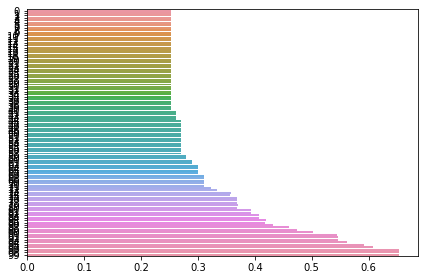

In [29]:
import matplotlib.pyplot as plt
ax = sns.barplot(sorted_atts[::-1],sorted_news[::-1],orient='h')


plt.tight_layout()
plt.show()

In [14]:
def from_idx_to_UID(model,idx):
    val = list(model.test_iterator.uid2index.keys())[list(model.test_iterator.uid2index.values()).index(idx)]
    print(val)
    return val

def from_idx_to_words(model,idxs):
    rslt = ""
    for i in idxs:
        if i != 0:
            val = list(model.test_iterator.word_dict.keys())[list(model.test_iterator.word_dict.values()).index(i)]
            rslt = rslt + " " + val

    print(rslt)
    return rslt

In [12]:
cols_behaviors = ['Impression ID', 
'User ID',
'Time',
'History' ,
'Impressions']

valid_pd = pd.read_csv(valid_behaviors_file,delimiter='\t',header=None)
valid_pd.columns = cols_behaviors

In [25]:
valid_pd['History'].loc[valid_pd['User ID']==from_idx_to_UID(nrms,173803)][16837]

U80234


'N55189 N46039 N51741 N53234 N11276 N264 N40716 N28088 N43955 N6616 N47686 N63573 N38895 N30924 N35671'

---- STOP ----

In [24]:
# W_Q | W_K | W_V haben alle Shape (400,400)
#! Mit '.weights' erhält man Namen + Shape | mit '.get_weights()' erhält man Werte

# Layer 2 -> Self attention
# print(nrms.userencoder.layers[1].weights)

for w in nrms.userencoder.layers[1].weights:
    print(w)

<tf.Variable 'embedding/embeddings:0' shape=(60993, 300) dtype=float32>
<tf.Variable 'self_attention/WQ:0' shape=(300, 400) dtype=float32>
<tf.Variable 'self_attention/WK:0' shape=(300, 400) dtype=float32>
<tf.Variable 'self_attention/WV:0' shape=(300, 400) dtype=float32>
<tf.Variable 'att_layer2/W:0' shape=(400, 200) dtype=float32>
<tf.Variable 'att_layer2/b:0' shape=(200,) dtype=float32>
<tf.Variable 'att_layer2/q:0' shape=(200, 1) dtype=float32>


In [35]:
K = tf.keras.backend

In [ ]:
print(nrms.userencoder.layers[3].get_weights())

In [4]:
print(nrms.run_eval(valid_news_file,valid_behaviors_file))

1326it [00:03, 394.81it/s]
2286it [00:50, 45.56it/s]
73152it [00:12, 6000.20it/s] 


{'group_auc': 0.6523, 'mean_mrr': 0.3096, 'ndcg@5': 0.3402, 'ndcg@10': 0.4042}


In [13]:
nrms.userencoder.layers[2].get_weights()[0]

array([[-0.00929161, -0.03283788, -0.01746786, ...,  0.03793544,
         0.04080621, -0.04679049],
       [-0.00500413, -0.07939074, -0.00327046, ..., -0.07469658,
        -0.00199292,  0.14261623],
       [-0.08461458, -0.12330832, -0.05046933, ..., -0.06024592,
         0.02804325,  0.08058362],
       ...,
       [-0.12721407,  0.02170204, -0.03146338, ..., -0.08306833,
        -0.00023414,  0.02669821],
       [ 0.04468788, -0.07690386, -0.04003213, ...,  0.01481769,
        -0.01676961, -0.06781785],
       [ 0.09491858,  0.03199428,  0.03079142, ...,  0.0825669 ,
        -0.02045336, -0.01826354]], dtype=float32)

Values weights shape : (400, 400)
Biggest entry on index : 223 with 0.09737421572208405


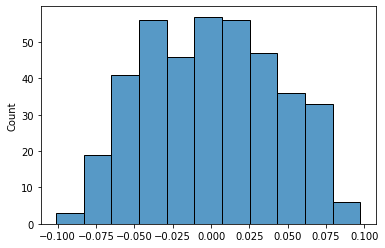

In [14]:
import seaborn as sns

all_weights = nrms.userencoder.layers[2].get_weights()[2]

print(f"Values weights shape : {all_weights.shape}")
weigts_V_first = nrms.userencoder.layers[2].get_weights()[2][0]
sns.histplot(weigts_V_first)

print(f"Biggest entry on index : {np.argmax(weigts_V_first)} with {np.max(weigts_V_first)}")


(400,)
[2.1563084 2.5811152 2.2729383 2.2155395 2.4878464 2.1093645]


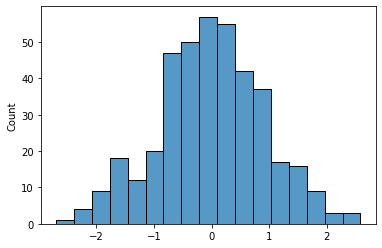

In [17]:
# Schaue welche Worte aufsummiert die größten Gewichte haben
sum_weights_for_word = np.sum(all_weights,axis=1)
print(sum_weights_for_word.shape)

sns.histplot(sum_weights_for_word)

print(sum_weights_for_word[sum_weights_for_word >=2])

In [ ]:
nrms.train_iterator.init_news(train_news_file)
nrms.train_iterator.init_behaviors(train_behaviors_file)

In [ ]:
nrms.run_eval(valid_news_file,valid_behaviors_file)

In [ ]:
attention_pred = tf.keras.Model(nrms.newsencoder.input,nrms.newsencoder.output)


for idx,batch_data_input in enumerate(nrms.train_iterator.load_data_from_file(train_news_file, train_behaviors_file)):
    # print(batch_data_input['impression_index_batch'].shape)
    print(f"NewsEncoder output: {nrms.userencoder(batch_data_input['impression_index_batch'])}")

    if idx == 5:
        break


In [7]:
print(nrms.newsencoder.layers)

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f59a64328b0>, <tensorflow.python.keras.layers.embeddings.Embedding object at 0x7f59a64321c0>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f59a6432dc0>, <recommenders.models.newsrec.models.layers.SelfAttention object at 0x7f59a6432eb0>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f59a63a4fd0>, <recommenders.models.newsrec.models.layers.AttLayer2 object at 0x7f59a6324580>]


In [63]:
df1 = pd.read_csv(train_behaviors_file,sep='\t')

In [ ]:
v = tf.Variable([1, 2])
init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess: 
    sess.run(init)
    # Usage passing the session explicitly.
    print(v.eval(sess))
    # Usage with the default session.  The 'with' block
    # above makes 'sess' the default session.
    print(v.eval())

In [64]:
df1.head()

,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N10414 N19347 N31801,N55689-1 N35729-0
0,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
1,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
2,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
3,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
4,6,U19739,11/11/2019 6:52:13 PM,N39074 N14343 N32607 N32320 N22007 N442 N19001...,N21119-1 N53696-0 N33619-1 N25722-0 N2869-0


In [3]:
nrms.run_eval(valid_news_file,valid_behaviors_file)

0it [00:00, ?it/s]/home/langenhagen/miniconda3/envs/tf_newsrec/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
2022-08-22 02:19:23.164983: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
1326it [00:05, 252.61it/s]
2286it [00:55, 40.96it/s]
73152it [00:19, 3846.36it/s]


{'group_auc': 0.5917, 'mean_mrr': 0.2544, 'ndcg@5': 0.2777, 'ndcg@10': 0.3426}

In [10]:
print(nrms.run_user(valid_news_file,valid_behaviors_file))

2286it [00:51, 44.72it/s]


In [4]:

with tf.compat.v1.Session() as sess:
    print("hello")

hello


2022-08-24 00:34:10.422608: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-24 00:34:10.424435: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-08-24 00:34:10.464391: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-24 00:34:10.464561: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: pascal01
2022-08-24 00:34:10.464571: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: pascal01
2022-08-24 00:34:10.465256: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.82.1
2022-08-24 00:34:10.465391: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.82.1
2022-08-24 00:34:10.465404: I tensorflow/stream_executor/cuda

In [ ]:
import pandas as pd
test_behaviors_file = "Dataset_small/test/behaviors.tsv"
test_news_file = "Dataset_small/test/news.tsv"

behav_df = pd.read_csv(test_behaviors_file,delimiter="\t",header=None)

nrms.test_iterator.init_news(test_news_file)

nrms.support_quick_scoring = False

results_100 = []


for i in range(1000):
    behav_df.iloc[i:i+1].to_csv("tmp/tmp_behav.tsv", sep="\t", index=False, header=False)
    new_behav = "tmp/tmp_behav.tsv"

    nrms.test_iterator.init_behaviors(behaviors_file = new_behav)
    results_100.append(nrms.run_eval(test_news_file,new_behav))


# df_100 = pd.DataFrame(results_100)
# df_25 = pd.DataFrame(results_25)

In [4]:
from recommenders_tests import train_epochs,load_small

In [ ]:
global shrink_size,data_path
data_path = "Dataset_small"
shrink_size = 20

yaml_file = os.path.join(data_path, "utils", r'nrms.yaml')
train_news_file,train_behaviors_file,valid_news_file,valid_behaviors_file,wordEmb_file,userDict_file,wordDict_file,vertDict_file,subvertDict_file = load_small()

hparams= prepare_hparams(yaml_file, 
                            wordEmb_file=wordEmb_file,
                            wordDict_file=wordDict_file, 
                            userDict_file=userDict_file,
                            vertDict_file=vertDict_file, 
                            subvertDict_file=subvertDict_file,
                            batch_size=32,
                            epochs=1)
nrms = NRMSModel(hparams, MINDIterator, 42)


# Fit model and evaluate after every epoch
_, results = nrms.fit(train_news_file, train_behaviors_file, valid_news_file, valid_behaviors_file,track_wand=False,results_as_list = True)

## Manuel Attention


In [3]:
from numpy import array
from numpy import random
from numpy import dot
from scipy.special import softmax
 
# encoder representations of four different words
word_1 = array([1, 0, 0])
word_2 = array([0, 1, 0])
word_3 = array([1, 1, 0])
word_4 = array([0, 0, 1])
 
# stacking the word embeddings into a single array
words = array([word_1, word_2, word_3, word_4])
 
# generating the weight matrices
random.seed(42)
W_Q = random.randint(3, size=(3, 3))
W_K = random.randint(3, size=(3, 3))
W_V = random.randint(3, size=(3, 3))
 
# generating the queries, keys and values
Q = words @ W_Q
K = words @ W_K
V = words @ W_V
 
# scoring the query vectors against all key vectors
scores = Q @ K.transpose()
 
# computing the weights by a softmax operation
weights = softmax(scores / K.shape[1] ** 0.5, axis=1)

print(weights)
print("--------")
 
# computing the attention by a weighted sum of the value vectors
attention = weights @ V
 
print(attention)

[[2.36089863e-01 7.38987555e-03 7.49130386e-01 7.38987555e-03]
 [4.54826323e-01 4.51736775e-02 4.54826323e-01 4.51736775e-02]
 [2.39275049e-01 7.43870015e-04 7.59237211e-01 7.43870015e-04]
 [8.99501754e-02 2.81554063e-03 9.05653685e-01 1.58059922e-03]]
--------
[[0.98522025 1.74174051 0.75652026]
 [0.90965265 1.40965265 0.5       ]
 [0.99851226 1.75849334 0.75998108]
 [0.99560386 1.90407309 0.90846923]]


## Training mit modifizierten User-Histories

*Idee: Verwende für das Training ausschließlich Nutzer mit größeren Historien als n (Threshold)*

Größe des benötigten Datensatzes ermitteln

In [1]:
import pandas as pd

train_behaviors_file = "Dataset_small/train/behaviors.tsv"
df = pd.read_csv(train_behaviors_file,sep="\t",names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])

print(len(df)) # -> 156965

156965


In [1]:
from loading_utils import download_mind_large
import os

if not os.path.exists("MINDlarge_train.zip"):
    download_mind_large(True)

2022-09-10 18:01:50.720135: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
df_full = pd.read_csv("MINDlarge_train.zip/train/behaviors.tsv",sep="\t",names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])

NameError: name 'pd' is not defined

In [5]:
df_full.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U87243,11/10/2019 11:30:54 AM,N8668 N39081 N65259 N79529 N73408 N43615 N2937...,N78206-0 N26368-0 N7578-0 N58592-0 N19858-0 N5...
1,2,U598644,11/12/2019 1:45:29 PM,N56056 N8726 N70353 N67998 N83823 N111108 N107...,N47996-0 N82719-0 N117066-0 N8491-0 N123784-0 ...
2,3,U532401,11/13/2019 11:23:03 AM,N128643 N87446 N122948 N9375 N82348 N129412 N5...,N103852-0 N53474-0 N127836-0 N47925-1
3,4,U593596,11/12/2019 12:24:09 PM,N31043 N39592 N4104 N8223 N114581 N92747 N1207...,N38902-0 N76434-0 N71593-0 N100073-0 N108736-0...
4,5,U239687,11/14/2019 8:03:01 PM,N65250 N122359 N71723 N53796 N41663 N41484 N11...,N76209-0 N48841-0 N67937-0 N62235-0 N6307-0 N3...


In [27]:
import numpy as np

n = 10
df_full['History'] = df_full['History'].astype('str')
df_app = df_full[df_full['History'].apply(lambda x : len(x.split(' '))>= n )]


In [31]:
print(len(df_app))
print(len(df_full[df_full['History'].apply(lambda x : len(x.split(' '))>= 100)]))


1573023
140706


,Impression ID,User ID,Time,History,Impressions
1611986,1611987,U694470,11/12/2019 3:23:29 AM,N3794 N69106 N39081 N92191 N12959 N128643 N996...,N51728-0 N2750-0 N85657-0 N46739-0 N53398-0 N4...
1093640,1093641,U167237,11/12/2019 2:17:25 PM,N119992 N14263 N17607 N113089 N48224 N85056 N3...,N88808-0 N7937-0 N47996-0 N62203-0 N79082-0 N1...
2167324,2167325,U677780,11/13/2019 2:33:57 PM,N21953 N62880 N65757 N11878,N39951-0 N53881-0 N102668-0 N123683-0 N75618-0...
1260627,1260628,U631403,11/11/2019 2:44:06 PM,N83576 N92191 N102339 N87211 N100765 N69106 N9...,N70822-0 N11682-0 N111088-0 N55792-0 N93643-0 ...
397912,397913,U251156,11/11/2019 6:04:06 AM,N65987 N51182 N79529 N79909 N104737 N6307 N997...,N425-0 N79812-0 N108749-0 N116323-0 N70786-0 N...
...,...,...,...,...,...
1917144,1917145,U152172,11/13/2019 7:22:34 AM,N31043 N2665 N67715 N128770 N85952 N34207 N178...,N47925-0 N57763-0 N124876-0 N99964-0 N42187-0 ...
2177162,2177163,U445449,11/11/2019 10:03:19 AM,N73412 N7156,N15053-1 N2624-0 N50466-0 N97355-0 N37379-0 N8...
1972568,1972569,U344296,11/12/2019 7:10:24 PM,N116312 N82779 N9740 N18195 N26935 N33917 N372...,N19292-0 N109703-1 N41101-0 N7968-0
841650,841651,U49488,11/9/2019 4:31:45 PM,N9279 N95287 N27258 N62767 N103240 N1396 N3579...,N22393-0 N97946-1 N45124-0


Als einzelne Funktion

In [1]:
import loading_utils

2022-09-10 18:05:44.062048: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [5]:
loading_utils.behaviors_with_historysize(150)

49938
In behaviors_with_historysize(): NOTE! The changed behaviors file consists only of 49938 entries instead of 156965


'/home/langenhagen/Masterthesis/Masterarbeit/Dataset_small/Users_with_n_behaviors/behaviors.tsv'

In [2]:
import pandas as pd
#pd1 = pd.read_csv('Dataset_small/Users_with_n_behaviors/behaviors.tsv',sep='\t',names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])

In [7]:
len(pd1)

49938

In [10]:
from loading_utils import setup_full_mind


setup_full_mind()

Number of valid large histories:  255990
Number of valid small histories:  50000
Number of train small histories:  50000
40000
10000
Final amount of users:  50000
Overlap of the 50k train users with the 50k sampled test users is:  10000


100%|██████████| 376471/376471 [10:17<00:00, 609.97it/s]


In [13]:
len(pd.read_csv("Dataset_small/valid/behaviors.tsv",sep='\t'))

73151

In [3]:
df_1 = pd.read_csv("Dataset_small/valid/behaviors.tsv",sep='\t',names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])
df_2 = pd.read_csv("Dataset_small/test/behaviors.tsv",sep='\t',names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])

df_concat = pd.concat([df_1,df_2])

df_full = df_full = pd.read_csv("MINDlarge_train.zip/train/behaviors.tsv",sep="\t",names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])


In [10]:
df_new = df_full.merge(df_concat, how='left')




In [12]:
df_concat.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U80234,11/15/2019 12:37:50 PM,N55189 N46039 N51741 N53234 N11276 N264 N40716...,N28682-0 N48740-0 N31958-1 N34130-0 N6916-0 N5...
1,2,U60458,11/15/2019 7:11:50 AM,N58715 N32109 N51180 N33438 N54827 N28488 N611...,N20036-0 N23513-1 N32536-0 N46976-0 N35216-0 N...
2,3,U44190,11/15/2019 9:55:12 AM,N56253 N1150 N55189 N16233 N61704 N51706 N5303...,N36779-0 N62365-0 N58098-0 N5472-0 N13408-0 N5...
3,4,U87380,11/15/2019 3:12:46 PM,N63554 N49153 N28678 N23232 N43369 N58518 N444...,N6950-0 N60215-0 N6074-0 N11930-0 N6916-0 N248...
4,5,U9444,11/15/2019 8:25:46 AM,N51692 N18285 N26015 N22679 N55556,N5940-1 N23513-0 N49285-0 N23355-0 N19990-0 N3...


In [1]:
from loading_utils import get_test_news


get_test_news()

2022-09-11 16:56:38.095058: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


PosixPath('/home/langenhagen/Masterthesis/Masterarbeit/Dataset_small/test/news.tsv')

Statistische Begründung wieso es sinnvoll ist, die Nutzer anzupassen

In [1]:
import pandas as pd
import numpy as np
df_small = pd.read_csv("Dataset_small/train/behaviors.tsv",sep="\t",names=['Impression ID', 'User ID', 'Time', 'History' , 'Impressions'])

df_small['Hist_size'] = df_small['History']

def split_len(x : str):
    
    if x is np.nan:
        return 0
    return len(x.split(" "))
    
df_small['History'].astype(str)
df_small['Hist_size'] = df_small['History'].apply(split_len)

In [2]:
df_small.head()

,Impression ID,User ID,Time,History,Impressions,Hist_size
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,9
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,82
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,16
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,10
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,4


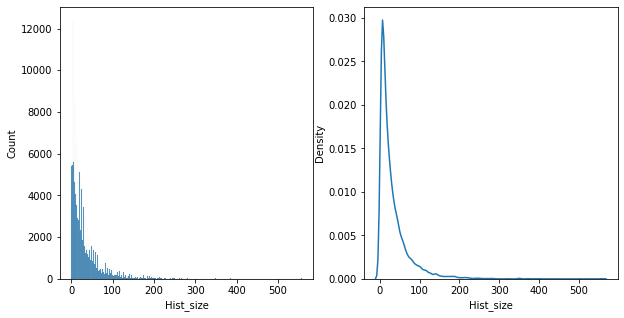

In [13]:
import seaborn as sb
import matplotlib.pyplot as plt




fig, ax =plt.subplots(1,2)

sb.histplot(df_small['Hist_size'], ax = ax[0])
sb.kdeplot(df_small['Hist_size'], ax = ax[1])

fig.set_size_inches(10,5)
fig.show()

In [4]:
len_small = len(df_small)
print(f"Number of history sizes > 1 : {len(df_small[df_small['Hist_size'] >= 1])}/{len_small} ({round(100*(len(df_small[df_small['Hist_size'] >= 1])/len_small),1)}%)" )
print(f"Number of history sizes > 10 : {len(df_small[df_small['Hist_size'] >= 10])}/{len_small} ({round(100*(len(df_small[df_small['Hist_size'] >= 10])/len_small),1)}%)" )
print(f"Number of history sizes > 25 : {len(df_small[df_small['Hist_size'] >= 25])}/{len_small} ({round(100*(len(df_small[df_small['Hist_size'] >= 25])/len_small),1)}%)" )
print(f"Number of history sizes > 50 : {len(df_small[df_small['Hist_size'] >= 50])}/{len_small} ({round(100*(len(df_small[df_small['Hist_size'] >= 50])/len_small),1)}%)" )
print(f"Number of history sizes > 100: {len(df_small[df_small['Hist_size'] >= 100])}/{len_small} ({round(100*(len(df_small[df_small['Hist_size'] >= 100])/len_small),1)}%)" )
print(f"Number of history sizes > 150: {len(df_small[df_small['Hist_size'] >= 150])}/{len_small} ({round(100*(len(df_small[df_small['Hist_size'] >= 150])/len_small),1)}%)" )

# Outputs
# Number of history sizes >= 1 : 153727/156965 (97.9%)
# Number of history sizes >= 10 : 110181/156965 (70.2%)
# Number of history sizes >= 25 : 65648/156965 (41.8%)
# Number of history sizes >= 50 : 31514/156965 (20.1%)
# Number of history sizes >= 100: 9638/156965 (6.1%)
# Number of history sizes >= 150: 3432/156965 (2.2%)

Number of history sizes > 1 : 153727/156965 (97.9%)
Number of history sizes > 10 : 110181/156965 (70.2%)
Number of history sizes > 25 : 65648/156965 (41.8%)
Number of history sizes > 50 : 31514/156965 (20.1%)
Number of history sizes > 100: 9638/156965 (6.1%)
Number of history sizes > 150: 3432/156965 (2.2%)


In [ ]:
import pandas as pd

df1 = pd.read_csv("Dataset_small/test/news.tsv",sep='\t')

In [ ]:
import os
import sys

os.environ["CUDA_VISIBLE_DEVICES"]="-1"
sys.path.insert(0,"recommenders")

import numpy as np
#import tensorflow as tf
import pandas as pd

from recommenders.models.newsrec.models.nrms import NRMSModel

import wandb
from recommenders.models.deeprec.deeprec_utils import \
    download_deeprec_resources
from recommenders.models.newsrec.io.mind_iterator import MINDIterator
from recommenders.models.newsrec.newsrec_utils import (get_mind_data_set,
                                               prepare_hparams)

from recommenders_tests import get_scores_ttest_recommenders, load_small

train_news_file,train_behaviors_file,valid_news_file,valid_behaviors_file,wordEmb_file,userDict_file,wordDict_file,vertDict_file,subvertDict_file = load_small()
yaml_file = os.path.join("Dataset_small", "utils", r'nrms.yaml')

test_behaviors_file="Dataset_small/test/behaviors.tsv"

hparams= prepare_hparams(yaml_file, 
                        wordEmb_file=wordEmb_file,
                        wordDict_file=wordDict_file, 
                        userDict_file=userDict_file,
                        vertDict_file=vertDict_file, 
                        subvertDict_file=subvertDict_file,
                        batch_size=32,
                        epochs=1)

iterator = MINDIterator
nrms = NRMSModel(hparams,iterator,42)


train_news_file = "Dataset_small/test/news.tsv"
train_behaviors_file = "Dataset_small/Users_with_n_behaviors/behaviors.tsv"

get_scores_ttest_recommenders(nrms,"Dataset_small/test/news.tsv","Dataset_small/test/behaviors.tsv","Test")

In [14]:
import tensorflow as tf
import pandas as pd

behav_df = pd.read_csv("Dataset_small/test/behaviors.tsv",delimiter="\t",header=None)
iterations = min(10000,len(behav_df))
for i in range(iterations):
        behav_df.iloc[i:i+1].to_csv("tmp/tmp_behav.tsv", sep="\t", index=False, header=False)

        with tf.io.gfile.GFile("tmp/tmp_behav.tsv", "r") as rd:
                impr_index = 0
                for line in rd:
                    
                    uid, time, history, impr = line.strip("\n").split("\t")[-4:]

                    # if len(line.strip("\n").split("\t")[-4:]) != 4:
                    #     print(line)

In [2]:
behav_df = pd.read_csv("Dataset_small/test/behaviors.tsv",delimiter="\t",header=None)


In [3]:
len(behav_df)

73353